<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. Introduction:
            </span>   
        </font>    
</h2>

<h3>
    <font color="purple">
        <span style='font-family:Georgia'>
            Introduction:
        </span>
    </font>
</h3>
<p>
    <span style='font-family:Georgia'>
        The insurance industry plays a crucial role in managing risks and providing financial protection against unforeseen events. With rising healthcare costs, understanding the factors that influence insurance claims is essential for optimizing operations, pricing policies, and enhancing customer satisfaction. In this context, our analysis aims to delve deep into an insurance dataset to uncover patterns and insights that can help in better predicting and managing claim amounts. By leveraging statistical techniques and exploratory data analysis (EDA), we strive to identify key variables that significantly impact insurance claims.
    </span>
</p>

<h3>
    <font color="purple">
        <span style='font-family:Georgia'>
            Business Objectives:
        </span>
    </font>
</h3>
<p>
    <span style='font-family:Georgia'>
        The primary business objectives of this analysis are:
    </span>
</p>
<ul>
    <li>
        <span style='font-family:Georgia'>
        <b>Identify Key Drivers:</b> Determine the most significant factors that influence insurance claim amounts, such as demographics, health metrics, and lifestyle choices.
        </span>
    </li>
    <li>
        <span style='font-family:Georgia'>
        <b>Predictive Modeling:</b> Develop predictive models that accurately forecast claim amounts based on identified key drivers, enhancing risk assessment and pricing strategies.
        </span>
    </li>
    <li>
        <span style='font-family:Georgia'>
        <b>Customer Segmentation:</b> Segment customers based on risk profiles to tailor insurance products and services, improving customer satisfaction and retention.
        </span>
    </li>
    <li>
        <span style='font-family:Georgia'>
        <b>Cost Management:</b> Analyze claims data to identify areas where cost savings can be achieved without compromising the quality of service.
        </span>
    </li>
</ul>
<p>
    <span style='font-family:Georgia'>
        By achieving these objectives, we aim to enhance the decision-making process, improve the profitability of insurance products, and provide better value to customers through personalized and cost-effective insurance solutions.
    </span>
</p>


<a id="libraries"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. Getting Jupyter Ready:
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Requirments: </b><br>
        <ol>
            <li><b>pandas</b>  ==  2.2.2 </li>
            <li><b>numpy</b>  ==  1.26.3 </li>
            <li><b>matplotlib</b>  ==  3.8.3 </li>
            <li><b>seaborn</b>  ==   0.13.2 </li>
            <li><b>plotly</b>  ==   5.18.0 </li>
        </ol>
    </span>    
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pickle

plt.style.use('seaborn-v0_8-darkgrid')
plt.style.use('fivethirtyeight')

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.2 Adjust Jupyer Views:
            </span>   
        </font>    
</h3>

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',50)

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.3 Supress Warnings:
            </span>   
        </font>    
</h3>

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

<a id="import"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Reading & Understanding the data
            </span>   
        </font>    
</h2>

<a id="input"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.1 Importing the input files
            </span>   
        </font>    
</h3>

In [3]:
df = pickle.load(open(r"D:\CampMain\DSMP 1.0\2) Python\3) Data analysis Process\Data Analysis Projects\Insurance_claim.pkl","rb"))

In [4]:
data = df.copy()

In [7]:
data['gender'] = data['gender'].map({0:'male',1:'female'})
data['diabetic'] = data['diabetic'].map({0:'no',1:'yes'})
data['smoker'] = data['smoker'].map({0:'no',1:'yes'})

<a id="inspect"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.2 Inspect Data Frames
            </span>   
        </font>    
</h3>

In [8]:
data.head()

age gender   bmi  bloodpressure diabetic  children smoker     region  \
0  39.0   male  23.2             91      yes         0     no  southeast   
1  24.0   male  30.1             87       no         0     no  southeast   
2  38.0   male  33.3             82      yes         0     no  southeast   
3  38.0   male  33.7             80       no         0     no  northwest   
4  38.0   male  34.1            100       no         0     no  northwest   

     claim  
0  1121.87  
1  1131.51  
2  1135.94  
3  1136.40  
4  1137.01

<a id="shape"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.1 shape and size
            </span>   
        </font>    
</h4>

In [6]:
# Database dimension
print("Database dimension     :",data.shape)
#Database size
print("Database size -         :",data.size)

Database dimension     : (1340, 9)
Database size -         : 12060


<a id="duplicated"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.2 info
            </span>   
        </font>    
</h4>

In [11]:
data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1340 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


<a id="duplicated"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.3 describe
            </span>   
        </font>    
</h4>

In [12]:
data.describe(include='all').transpose()

count unique        top  freq          mean           std  \
age            1340.0    NaN        NaN   NaN     38.078358     11.082176   
gender           1340      2       male   678           NaN           NaN   
bmi            1340.0    NaN        NaN   NaN     30.668955      6.106735   
bloodpressure  1340.0    NaN        NaN   NaN     94.157463     11.434712   
diabetic         1340      2         no   698           NaN           NaN   
children       1340.0    NaN        NaN   NaN      1.093284      1.205334   
smoker           1340      2         no  1066           NaN           NaN   
region           1340      4  southeast   446           NaN           NaN   
claim          1340.0    NaN        NaN   NaN  13252.745642  12109.609288   

                   min       25%       50%        75%       max  
age               18.0      29.0      38.0       47.0      60.0  
gender             NaN       NaN       NaN        NaN       NaN  
bmi               16.0    26.275      30.4       34.7      53.1  
bloodpressure     80.0      86.0      92.0       99.0     140.0  
diabetic           NaN       NaN       NaN        NaN       NaN  
children           0.0       0.0       1.0        2.0       5.0  
smoker             NaN       NaN       NaN        NaN       NaN  
region             NaN       NaN       NaN        NaN       NaN  
claim          1121.87  4719.685  9369.615  16604.305  63770.43

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        <ul>
            <li>The <code>Age</code> look like normally distributed</li>
            <li>Although average <code>bmi</code> is 30 which indicates that most of people lies within overweight to obesity. But after looking the max value, can say that the mean is manipulated by the outliers.</li>
        </ul>
    </span>    
</div>


<a id="duplicated"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.4 types
            </span>   
        </font>    
</h4>

In [13]:
categorical_columns = ['gender', 'diabetic', 'children', 'smoker', 'region']

numerical_columns = ['age' ,'bmi', 'bloodpressure', 'claim']

<a id="duplicated"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.5 duplicated
            </span>   
        </font>    
</h4>

In [9]:
data.index

RangeIndex(start=0, stop=1340, step=1)

In [10]:
data.duplicated().sum()


0

In [14]:
# check_null value of particular column

def check_missing(df):
    X = (df.isnull().sum() / df.shape[0] ).mul(100).round(2).sort_values(ascending=False).reset_index().rename(columns={'index':'feature',0:'missing_percentage'})
    return X[X['missing_percentage']>0]


check_missing(data)

Empty DataFrame
Columns: [feature, missing_percentage]
Index: []

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>No missing value in the dataset
    </span>    
</div>


<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            4. Analyzing the data
            </span>   
        </font>    
</h2>


<h3>
    <font color="purple">
        <span style='font-family:Georgia'>
            Steps of doing Univariate Analysis on Numerical columns:
        </span>
    </font>
</h3>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def outliers_detect(column):
    # Calculate the first quartile (Q1)
    Q1 = column.quantile(0.25)
    # Calculate the third quartile (Q3)
    Q3 = column.quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Find outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    if outliers.empty:
        return 0
    else:
        return len(outliers)

def univariate_num(df, target_col, bin=20, hist_color=None, kde_color=None, box_color=None, figsize=(20, 12)):
    # Separate data into premium and non-premium
    data = df.copy()

    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=target_col,  bins=bin, stat='density', color=hist_color)
    sns.kdeplot(data=data, x=target_col, color=kde_color)
    plt.title(f'Histogram - {target_col}')
    plt.xlabel(target_col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

    sns.boxplot(data=data, x=target_col,  color=box_color, orient='h')
    plt.title(f'Box Plot - {target_col}')
    plt.xlabel(target_col)
    
    outliers = outliers_detect(data[target_col])
    print(f"Skewness of {target_col}: ", data[target_col].skew())
    print(f"Kurtosis of {target_col}: ", data[target_col].kurt() + 3)
    print(f"Outliers in {target_col}: ", outliers)
    print()

    plt.tight_layout()
    plt.show()

    print('\n'*4)

In [13]:
print(numerical_columns)

['age', 'bmi', 'bloodpressure', 'claim']


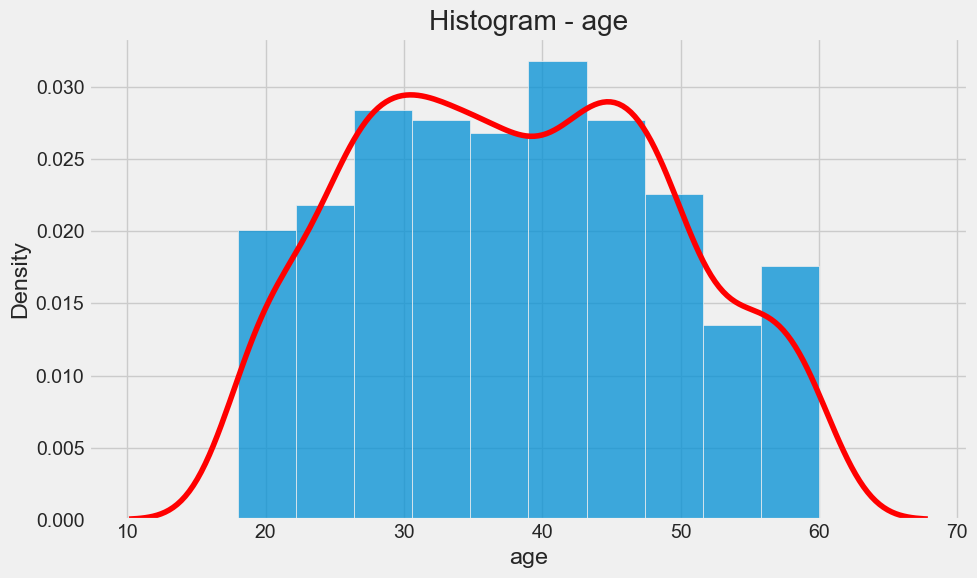

Skewness of age:  0.11390294679791582
Kurtosis of age:  2.0606983932071397
Outliers in age:  0



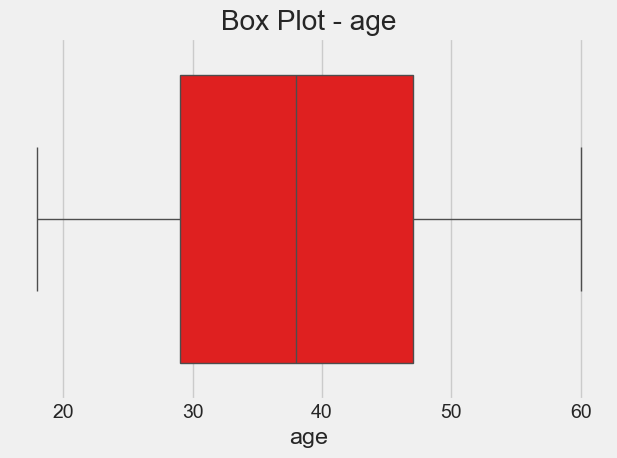

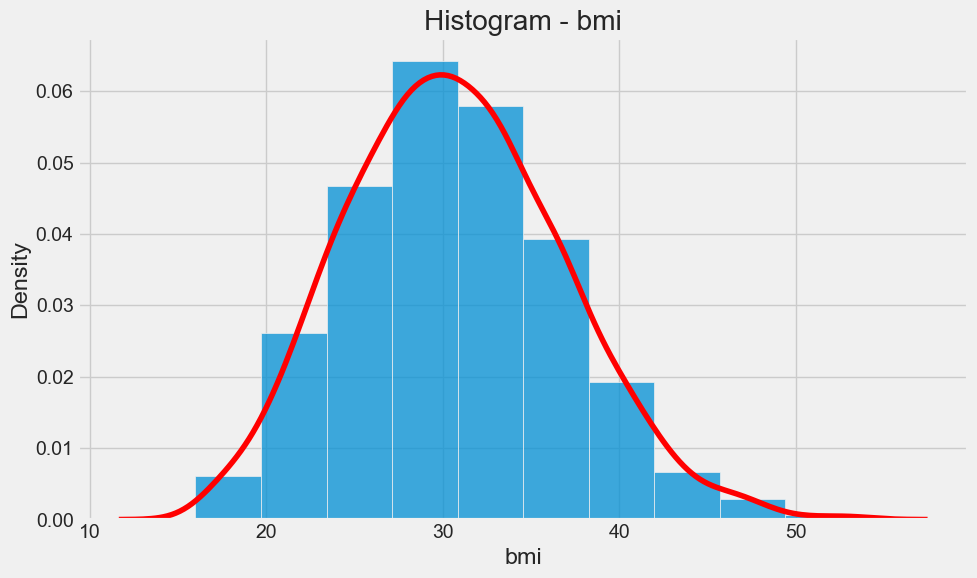

Skewness of bmi:  0.28597245020808587
Kurtosis of bmi:  2.9397997873762387
Outliers in bmi:  9



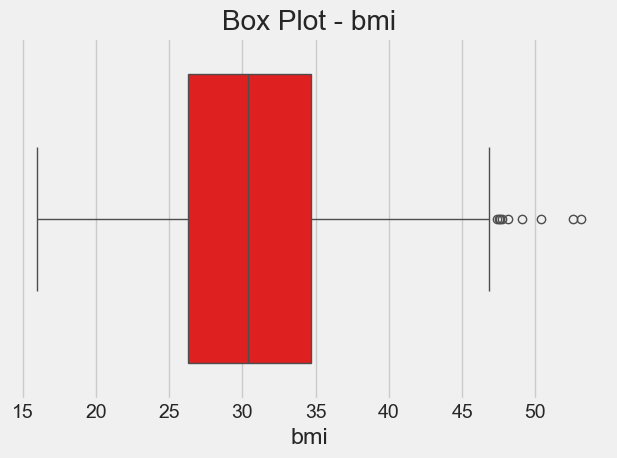

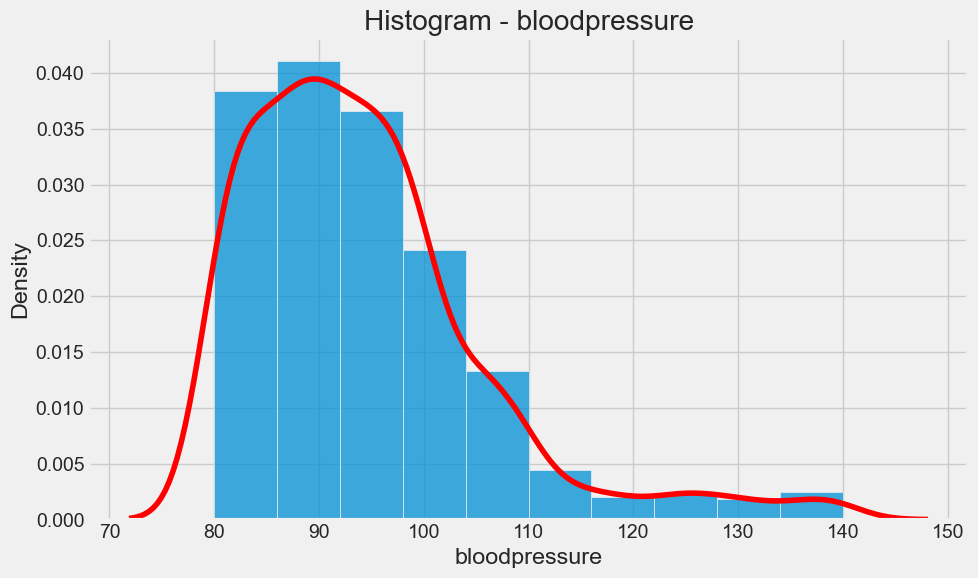

Skewness of bloodpressure:  1.4835342102293079
Kurtosis of bloodpressure:  5.890031852235991
Outliers in bloodpressure:  62



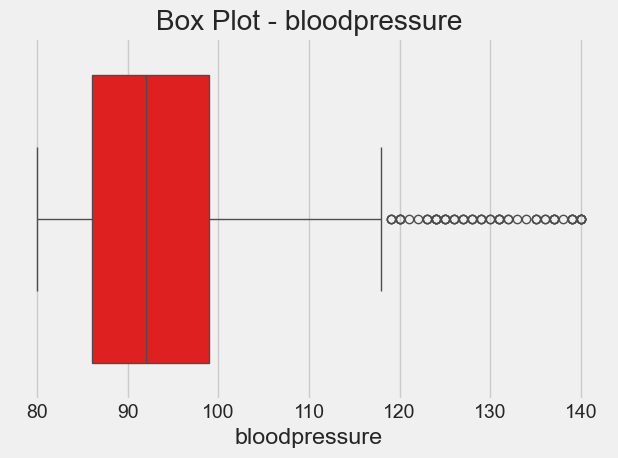

In [23]:
for col in numerical_columns:
    if col != 'claim':
        univariate_num(data, target_col=col, bin=10, figsize=(10, 6), kde_color='red', box_color='red')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        <ul>
            <li>
                <b>Age:</b> The age distribution is approximately symmetric with a skewness of 0.11 and a kurtosis of 2.06. There are no outliers in the age data, indicating a relatively normal and consistent distribution across the dataset.
            </li>
            <li>
                <b>BMI (Body Mass Index):</b> The BMI distribution also shows a slight positive skewness of 0.29 and a kurtosis of 2.94, which is close to the normal distribution. However, there are 9 outliers in the BMI data, suggesting the presence of individuals with significantly higher or lower BMI values compared to the rest of the population.
            </li>
            <li>
                <b>Blood Pressure:</b> The blood pressure distribution exhibits a notable positive skewness of 1.48 and a kurtosis of 5.89, indicating a long right tail and a peak higher than a normal distribution. The presence of 62 outliers suggests a substantial number of individuals with unusually high blood pressure readings, which could be a point of concern for health and risk assessments.
            </li>
        </ul>
    </span>    
</div>


<a id="univariate"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.1.2 Univariate Analysis on Categorical Columns
            </span>   
        </font>    
</h3>

In [16]:
# we can categorize the bmi values
def bmi_categories(value):
    val = None
    if pd.isna(value):
        val =  np.nan

    if value < 18.5:
        val =  "underweight"
    elif value >= 18.5 and value < 25:
        val =  "normal"
    elif value >= 25 and value <= 30:
        val =  "overweight"
    elif value >= 30:
        val =  "obesity"
    
    return val

# now create the categories according to the values
data['health_status'] = data["bmi"].apply(lambda x: bmi_categories(x))

In [17]:
# can categorize the blood-pressure also.
def blood_pressure_cat(value):
    val = None
    if pd.isna(value):
        return np.nan

    if value < 120:
        val = "normal"
    elif value >= 120 and value < 130:
        val = "elevated"
    elif value >= 130 and value < 140:
        val = "hbp-stage1" # high blood pressure stage 1
    elif value >= 140 and value < 180:
        val = "hbp-stage2" # high blood pressure stage 2
    elif value >= 180:
        val = "hypertensive_crisis"
    
    return val

# now convert the bloodpressure to categorical
data['bloodpressure_status'] = data["bloodpressure"].apply(lambda x: blood_pressure_cat(x))

In [18]:
categorical_columns.insert(-1, 'health_status')
categorical_columns.insert(-1, 'bloodpressure_status')

In [33]:
print(categorical_columns)

['gender', 'diabetic', 'children', 'smoker', 'health_status', 'bloodpressure_status', 'region']


In [19]:
def univariate_cat(col, bar_head=2, pie_head=2, colors=['r', 'b', 'g', 'y', 'm', 'c', 'k'], figsize=(10, 6)):
    # Get value counts
    value_counts = col.value_counts()
    top_bar = value_counts.head(bar_head)
    top_pie = value_counts.head(pie_head)

    # Adjust colors if there are more categories than predefined colors
    if len(top_bar) > len(colors):
        colors = sns.color_palette("hsv", len(top_bar))
    
    # Convert value counts to DataFrame for easier handling with hue
    top_bar_df = top_bar.reset_index()
    top_bar_df.columns = [col.name, 'counts']
    
    # Bar plot
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=top_bar_df, x=col.name, y='counts', hue=col.name, palette=colors[:len(top_bar)], dodge=False, legend=False)
    
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(), decimals=2), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
        
    plt.title(f'Bar plot - {col.name}')
    plt.xlabel(col.name)
    plt.ylabel('Frequency')
    plt.show()

    # Pie plot
    top_pie.plot(kind='pie', 
                 autopct='%0.1f%%', 
                 colors=colors[:len(top_pie)], 
                 figsize=figsize, 
                 legend=True)
    
    plt.title(f'Pie plot - {col.name}')
    plt.ylabel('')
    plt.show()
    print("\n" * 3)

    return 

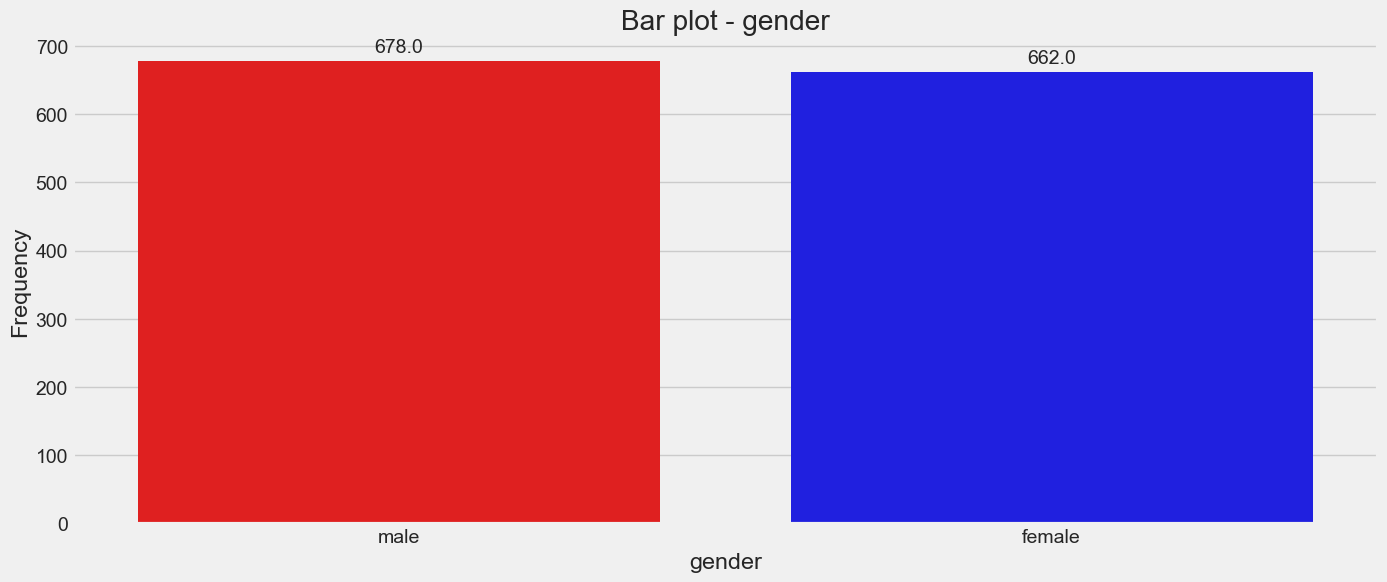

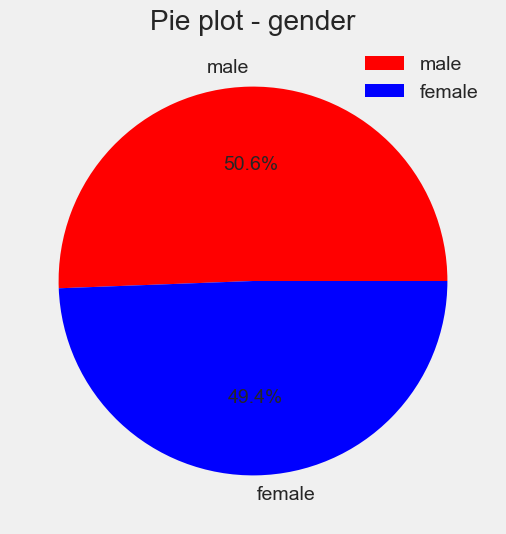

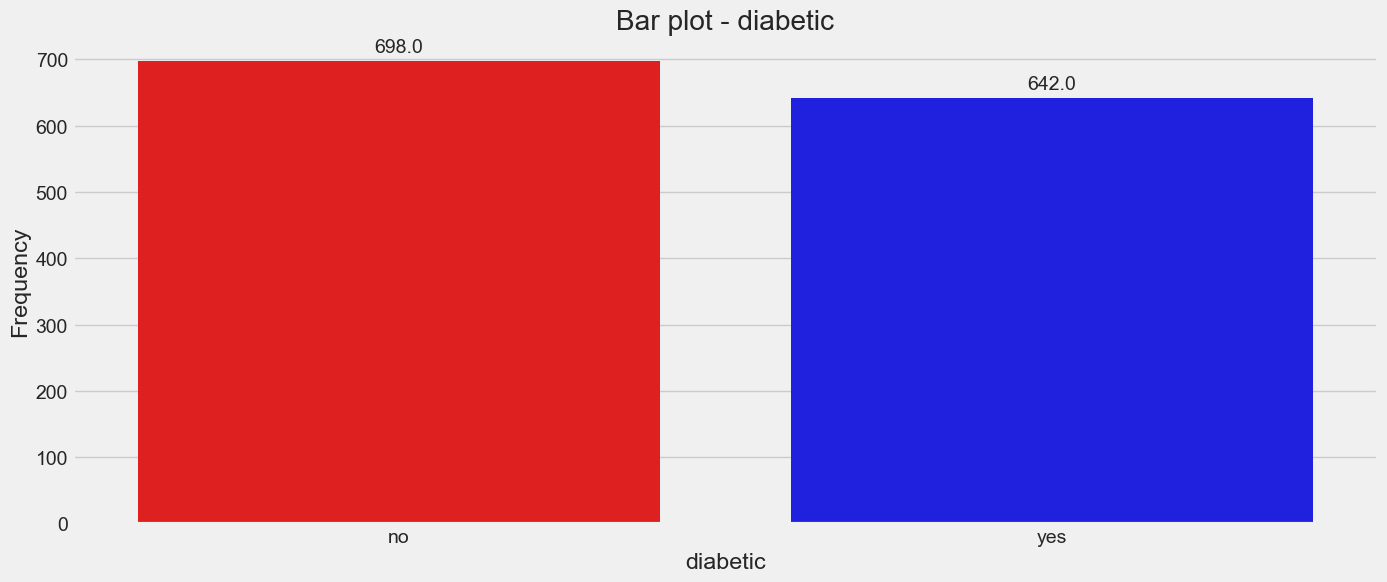

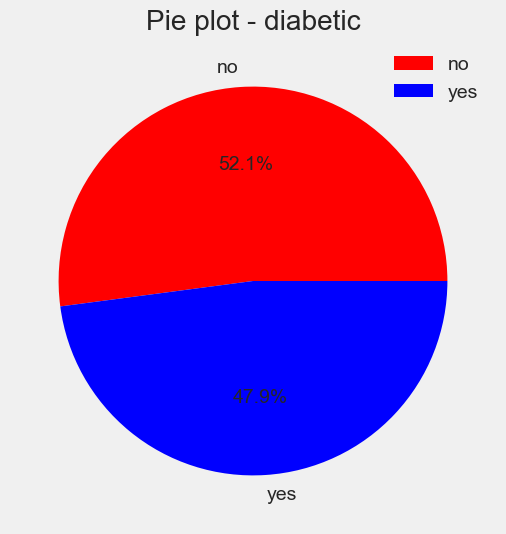

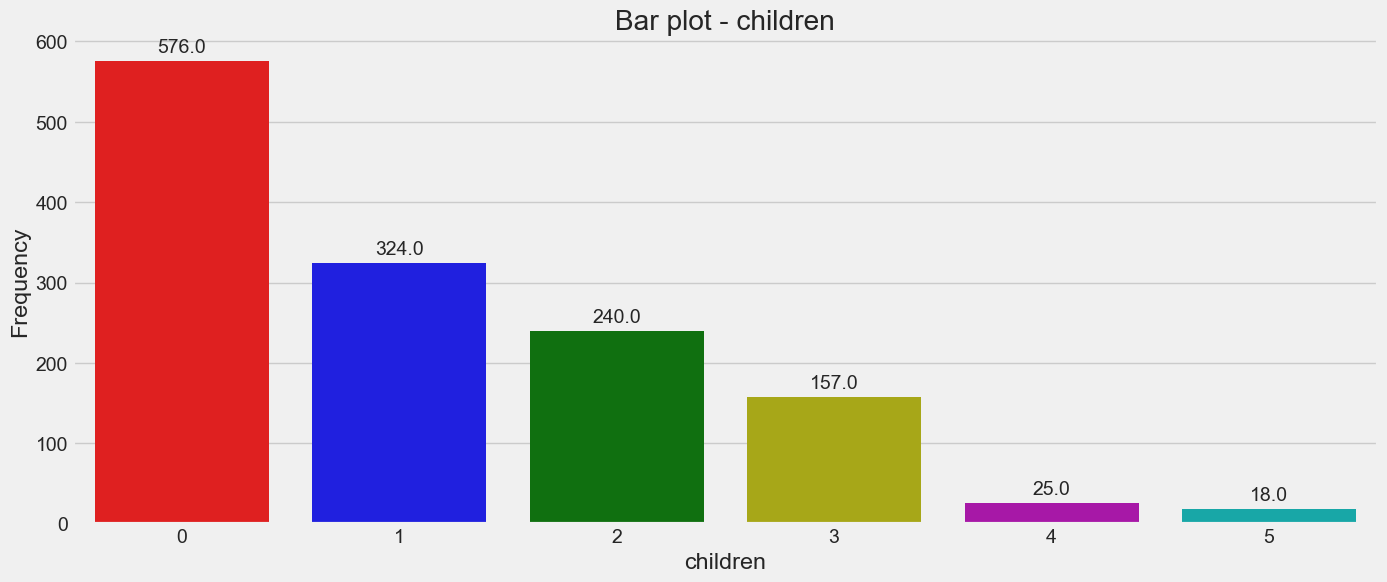

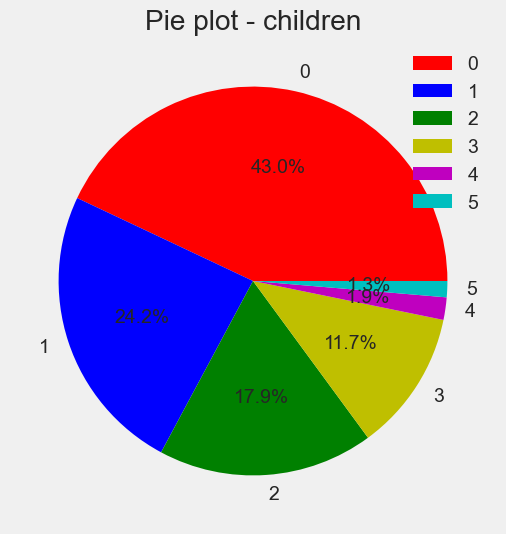

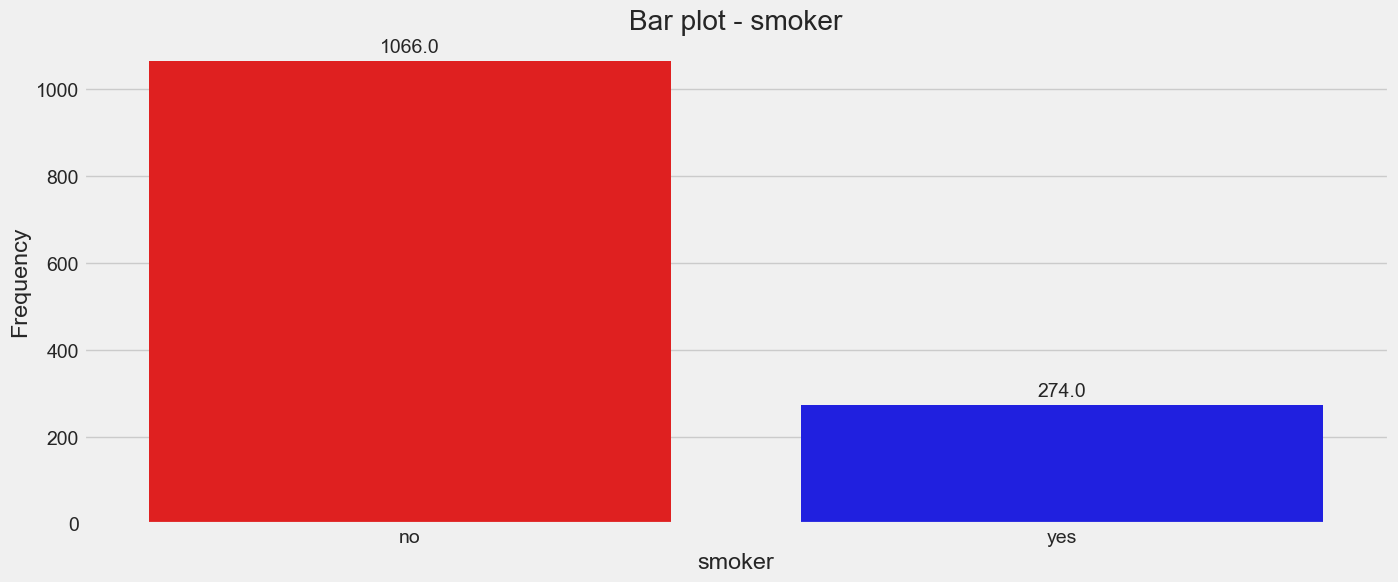

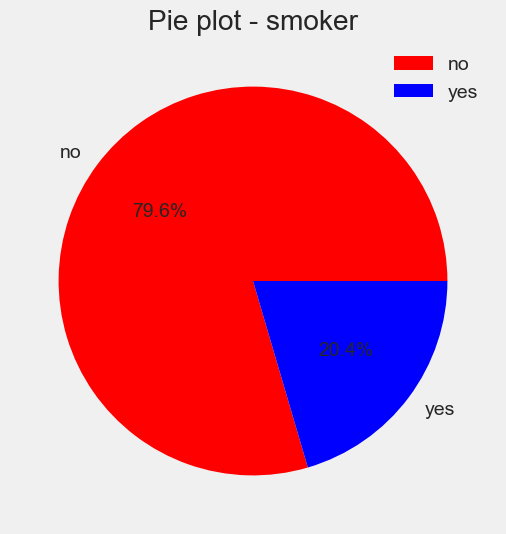

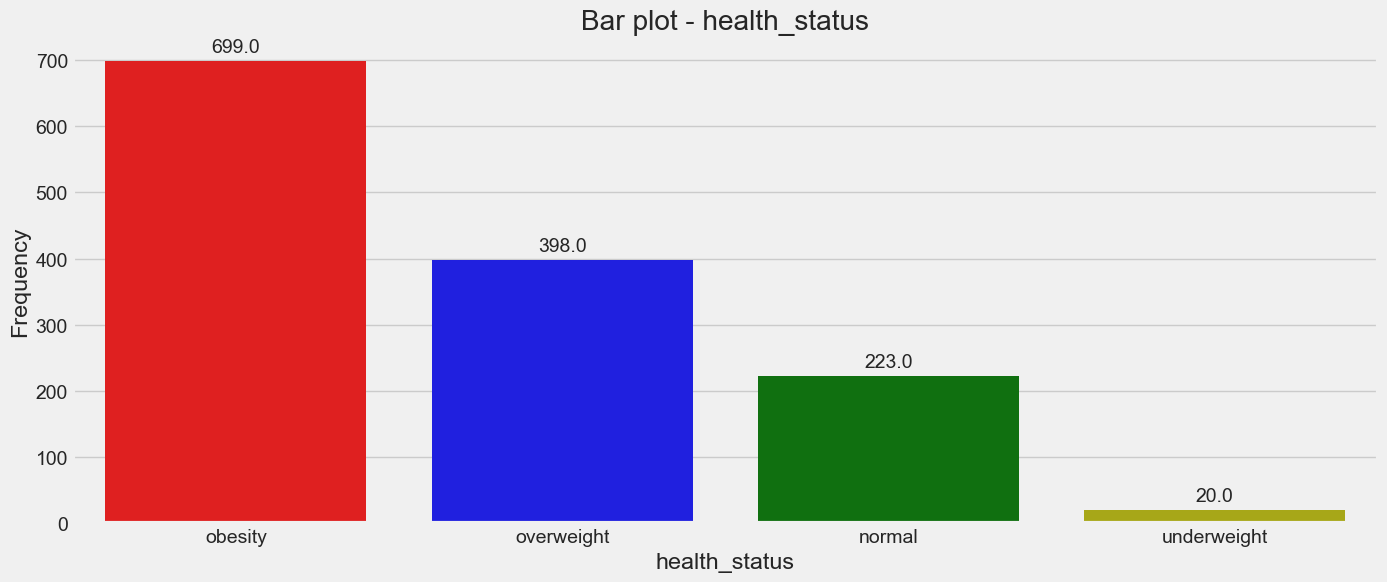

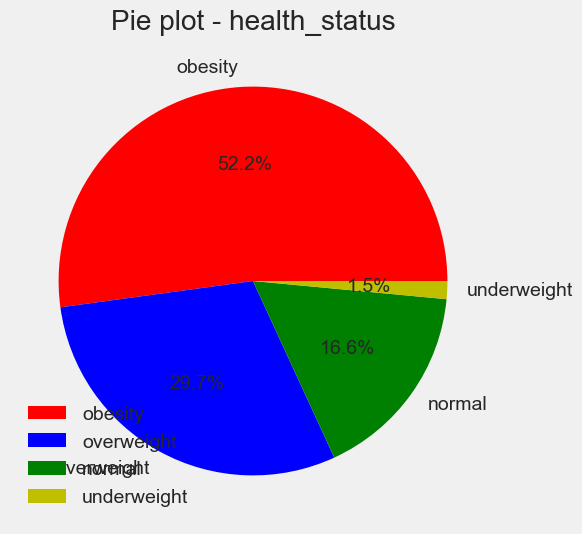

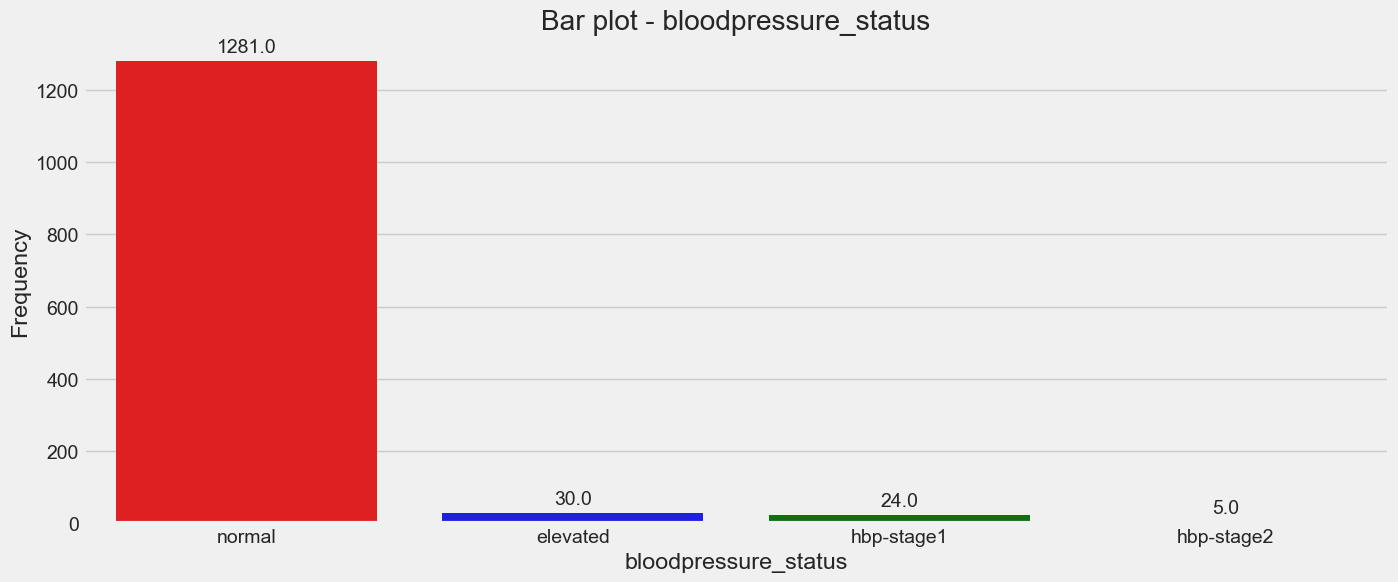

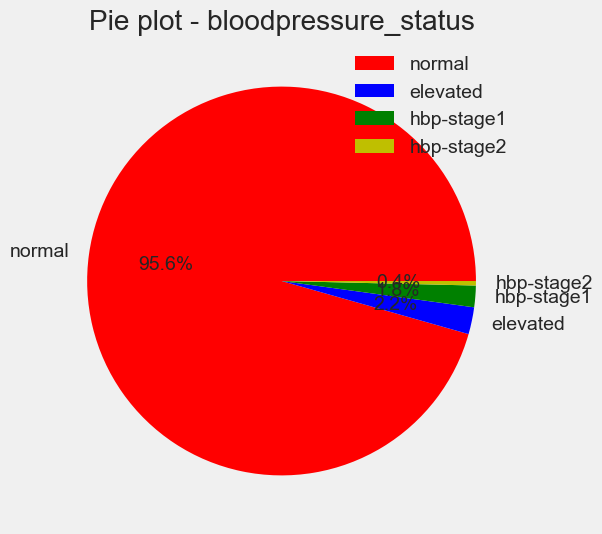

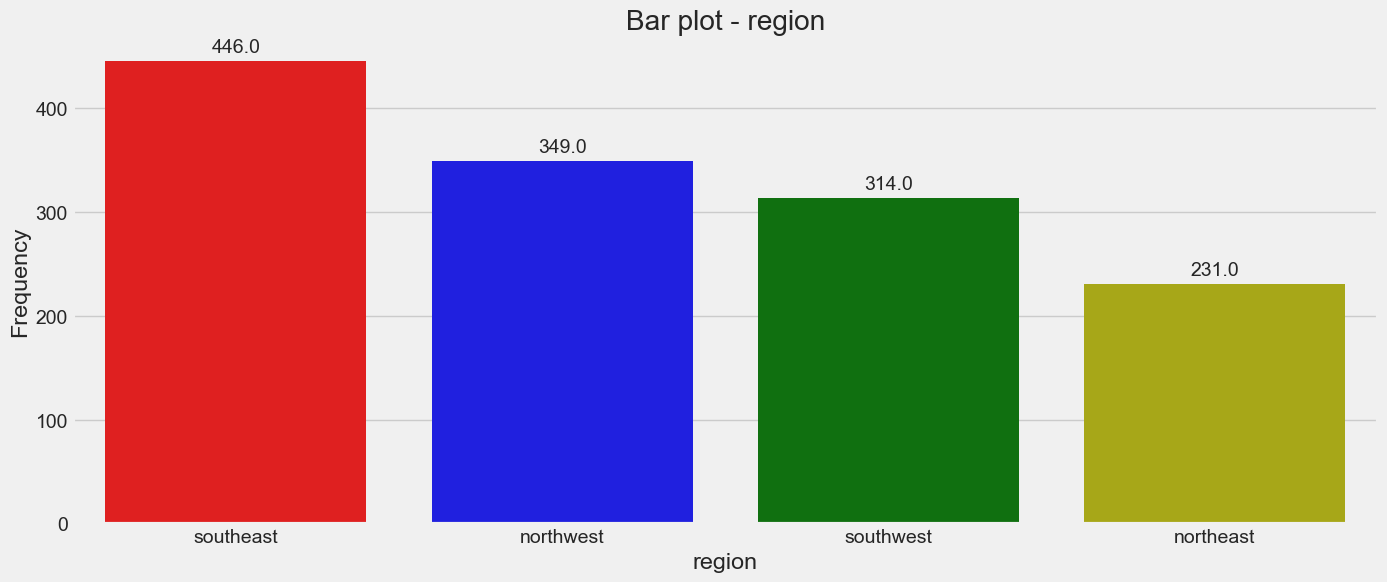

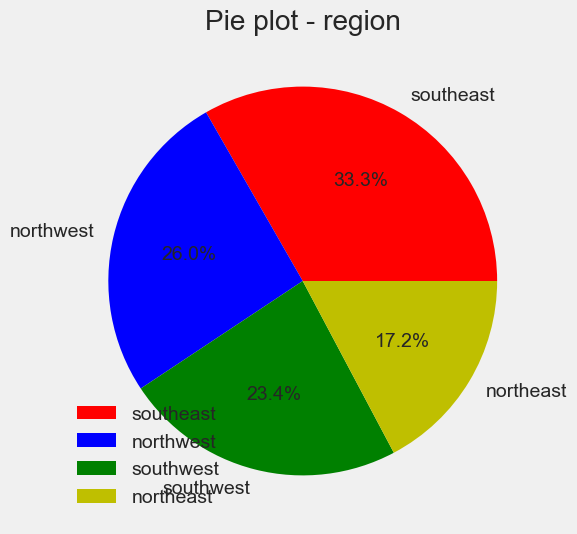

In [20]:
for col in categorical_columns:
    univariate_cat(data[col], bar_head=10, pie_head=10, figsize=(15, 6))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insights:</b><br>
        <ul>
            <li>
                <b>Gender:</b> The gender distribution is quite balanced with 50.6% male and 49.4% female. This balance ensures that gender-related insights will be well-represented in any further analysis of claim data.
            </li>
            <li>
                <b>Diabetic Status:</b> Similarly, the diabetic status is evenly distributed, with 52.1% non-diabetic and 47.9% diabetic. This balance indicates that diabetic status is a crucial feature for predicting claims.
            </li>
            <li>
                <b>Children:</b> The distribution of children shows that 43% of individuals do not have any children, 24.2% have one child, 17.9% have two children, and 11.7% have three children. The remaining small percentages can be grouped as having more than three children. This balance is useful for understanding the impact of family size on claims.
            </li>
            <li>
                <b>Smoker Status:</b> The data reveals that 79.6% are non-smokers and 20.4% are smokers, indicating an imbalance. However, the significant proportion of smokers highlights the potential impact of smoking on insurance claims.
            </li>
            <li>
                <b>Health Status:</b> The health status shows that 52.2% are obese, 29.7% are overweight, 16.6% have a normal weight, and 1.5% are underweight. This balance is essential for analyzing the relationship between health status and claims.
            </li>
            <li>
                <b>Blood Pressure Status:</b> An overwhelming 95.5% of individuals have normal blood pressure, with the remaining percentage being negligible. This indicates that blood pressure status may not be a strong predictor for claims due to its imbalance. <code>imbalanced</code>
            </li>
            <li>
                <b>Region:</b> The regional distribution shows that 33.3% of individuals are from the Southeast, 26% from the Northwest, 23.4% from the Southwest, and 17.2% from the Northeast. This balance across regions will help in understanding geographical influences on claims.
            </li>
        </ul>
    </span>
</div>


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Action:</b><br>
        <ul>
            <li><b>Imbalanced Columns:</b> Marked columns with significant data imbalances to easily identify potential candidates for dropping.</li>
            <li><b> Children:</b> Merged children 4 & 5 into a single category.</li>
        </ul>
    </span>
</div>


In [21]:
# Merge children categories into 4
data['children'] = data['children'].apply(lambda x: 4 if x > 3 else x)

# Define a function to check if a column is imbalanced
def is_imbalanced(col, threshold=0.9):
    top_value_ratio = col.value_counts(normalize=True).max()
    return top_value_ratio >= threshold

# Identify imbalanced columns
imbalanced_columns = [col for col in data.columns if is_imbalanced(data[col])]

# Drop imbalanced columns
data_cleaned = data.drop(columns=imbalanced_columns)

# Output the cleaned DataFrame
print("Imbalanced columns dropped:", imbalanced_columns)
data_cleaned.head()

Imbalanced columns dropped: ['bloodpressure_status']


age gender   bmi  bloodpressure diabetic  children smoker     region  \
0  39.0   male  23.2             91      yes         0     no  southeast   
1  24.0   male  30.1             87       no         0     no  southeast   
2  38.0   male  33.3             82      yes         0     no  southeast   
3  38.0   male  33.7             80       no         0     no  northwest   
4  38.0   male  34.1            100       no         0     no  northwest   

     claim health_status  
0  1121.87        normal  
1  1131.51       obesity  
2  1135.94       obesity  
3  1136.40       obesity  
4  1137.01       obesity

In [22]:
for name in imbalanced_columns:
    categorical_columns.remove(name)

<a id="univariate"></a>
<h2>   
      <font color = orange >
            <span style='font-family:Georgia'>
            4.2 Bivariate Analysis
            </span>   
        </font>    
</h2>

<a id="univariate"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.2.1 Numerical Vs Numerical
            </span>   
        </font>    
</h3>

In [23]:
def numerical_vs_numerical(data, num_col1, num_col2='claim', figsize=(18, 12)):

    # Set up the subplot structure
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Scatter plot with Plotly
    fig1 = px.scatter(data, x=num_col1, y=num_col2, color='claim',
                     title=f'Scatter Plot: {num_col1} vs {num_col2}',
                     labels={num_col1: num_col1, num_col2: num_col2})
    fig1.show()

    # Line plot with Seaborn
    sns.lineplot(x=data[num_col1], y=data[num_col2], ax=axes[0])
    axes[0].set_title(f'Line Plot: {num_col1} vs {num_col2}')
    axes[0].set_xlabel(num_col1)
    axes[0].set_ylabel(num_col2)


    # Joint plot with regression
    sns.regplot(x=num_col1, y=num_col2, data=data, ax=axes[1], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    axes[1].set_title(f'Joint Plot: {num_col1} vs {num_col2}')
    axes[1].set_xlabel(num_col1)
    axes[1].set_ylabel(num_col2)
    
    plt.tight_layout()
    plt.show()
    
    # Correlation coefficient
    corr = data[[num_col1, num_col2]].corr().iloc[0, 1]

    print(f'Correlation between {num_col1} and {num_col2}: {corr:.2f}')
    print('\n' * 3)

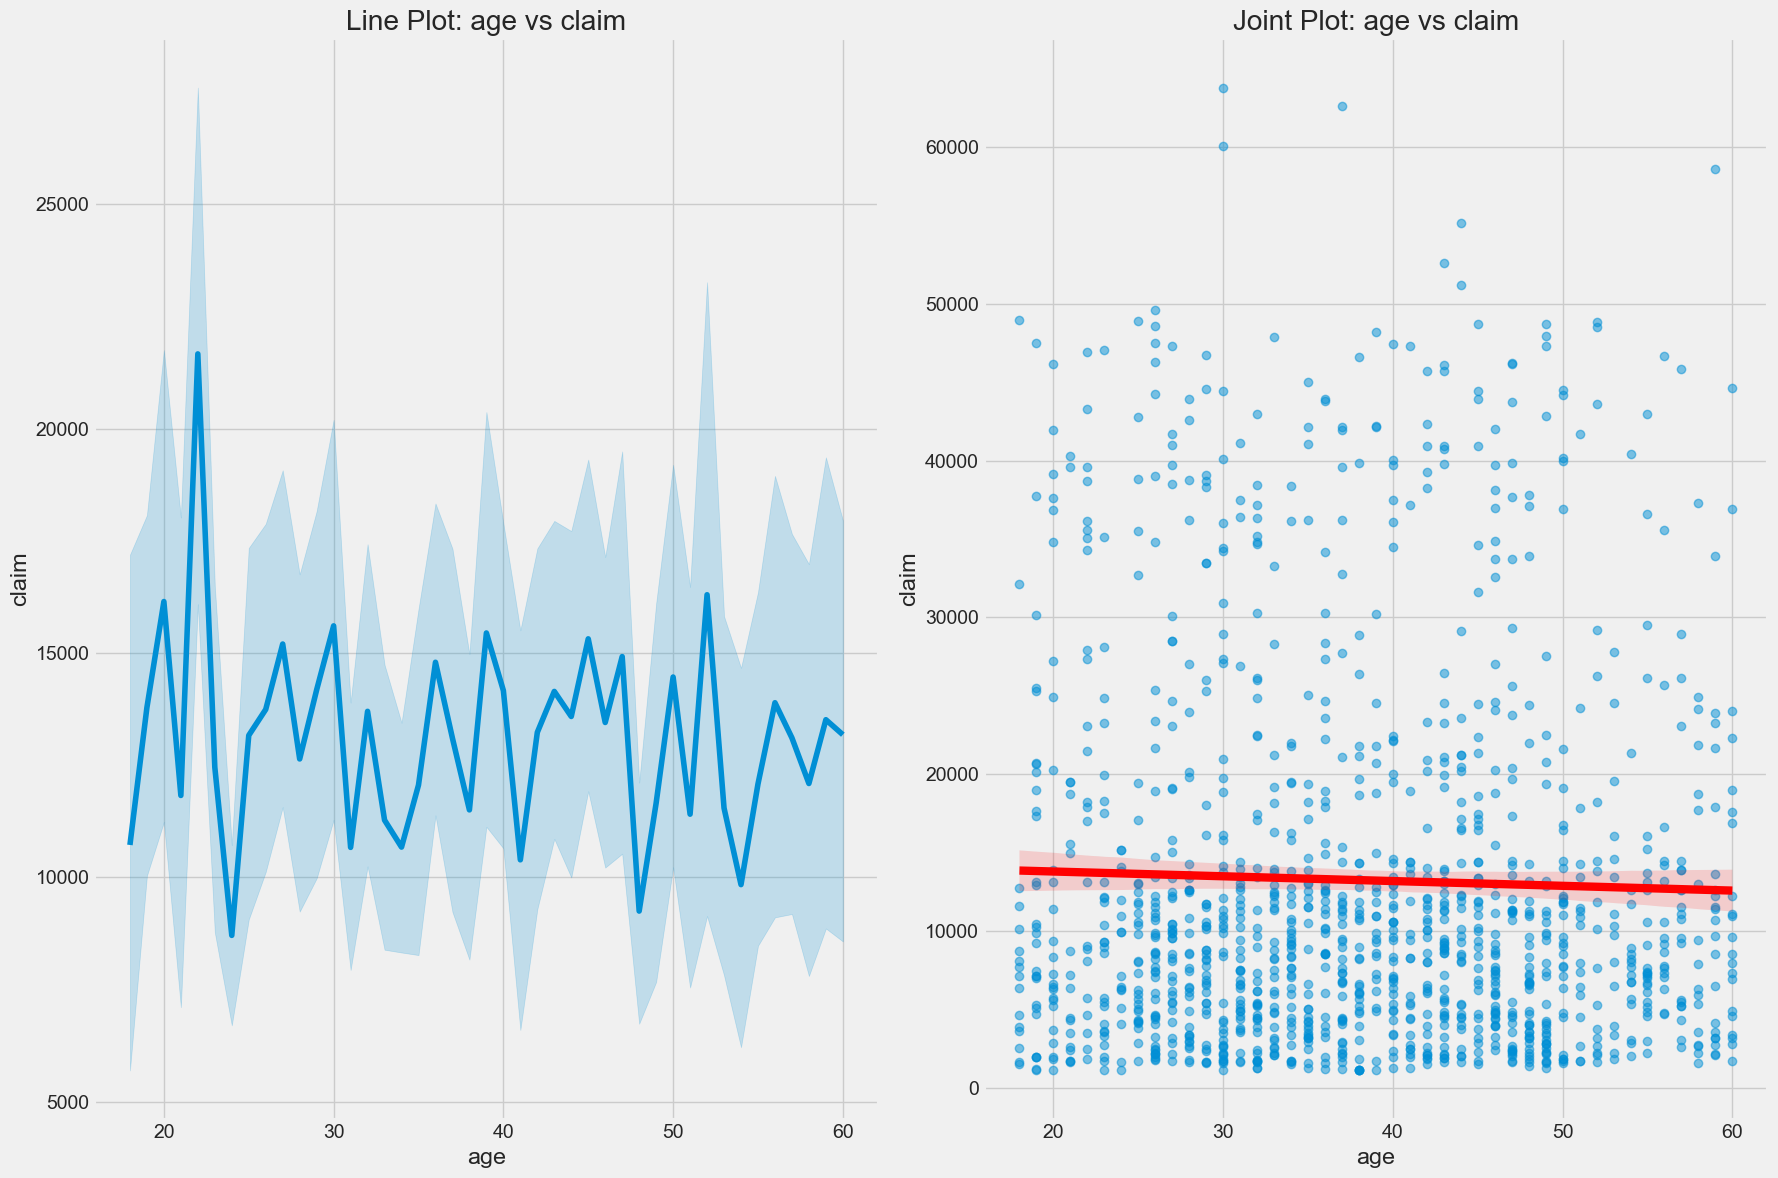

Correlation between age and claim: -0.03






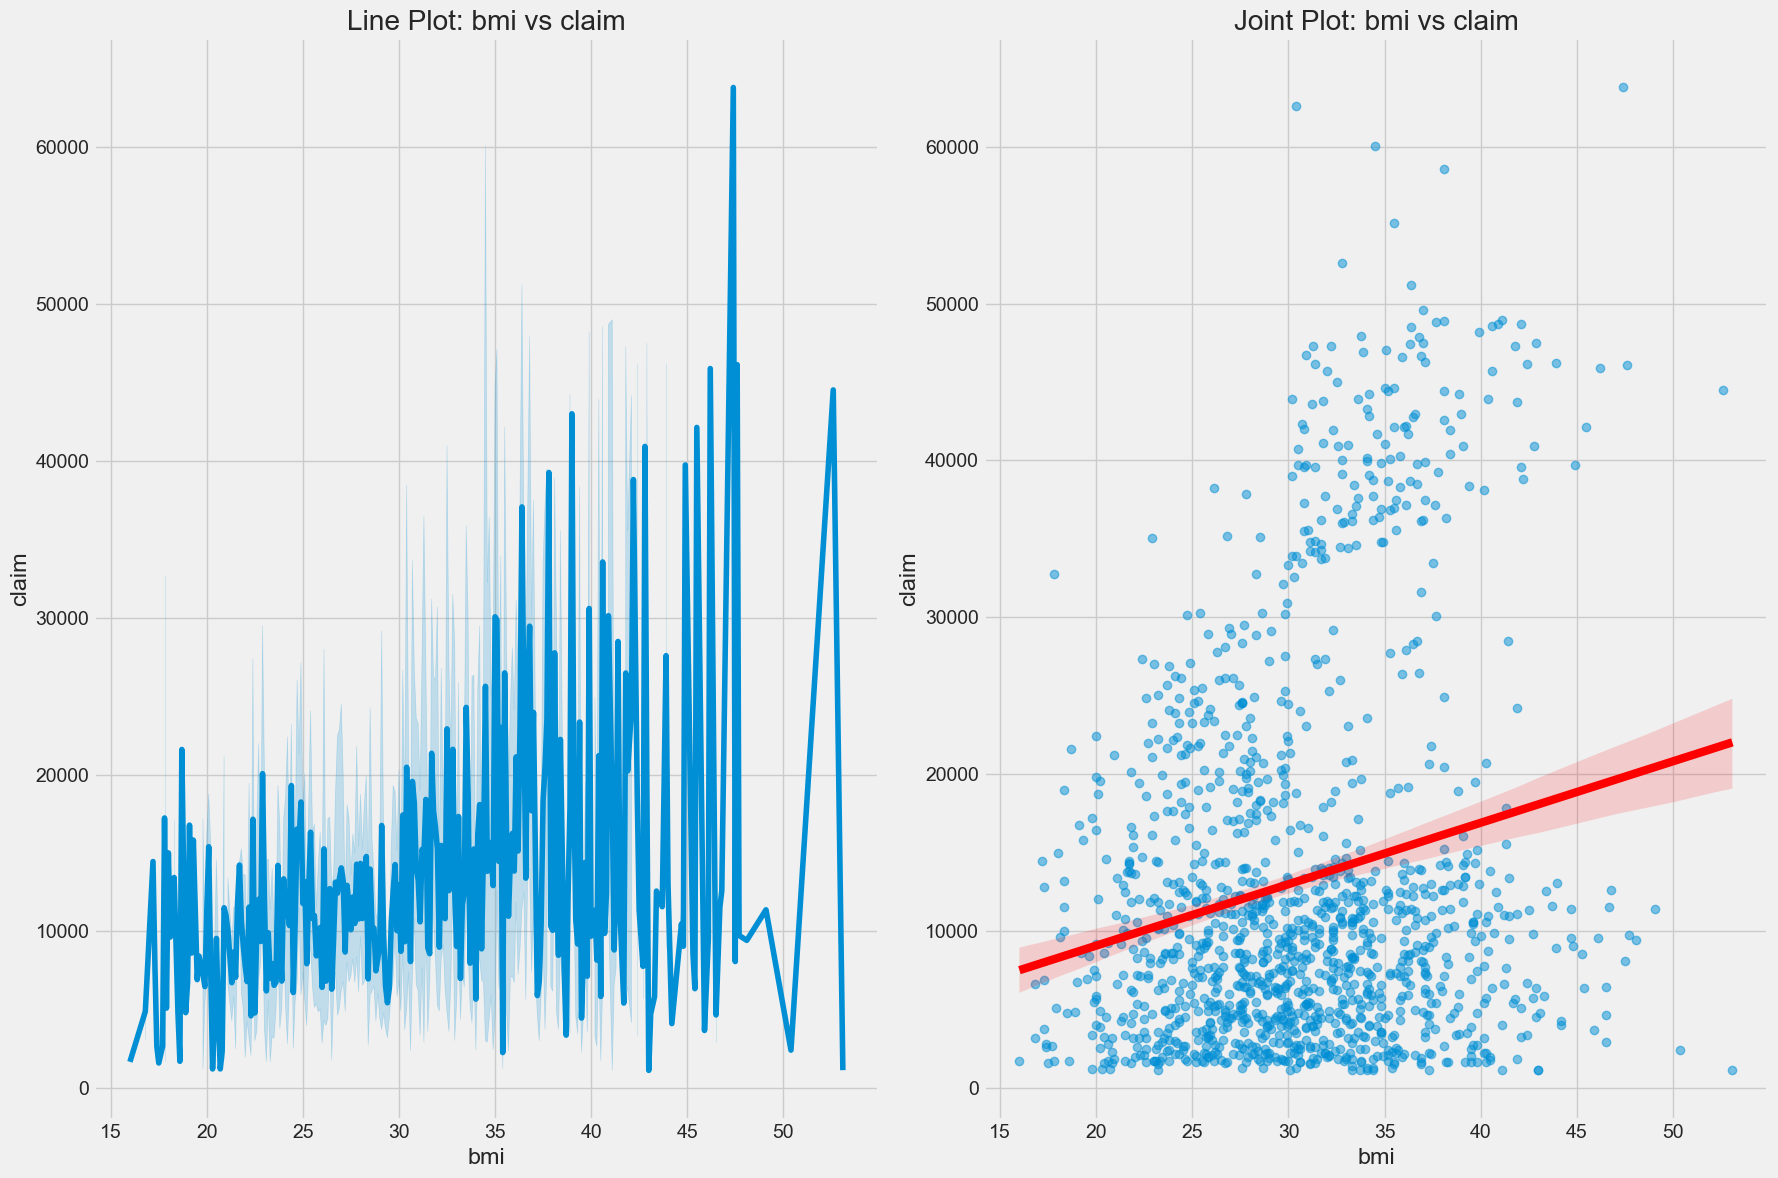

Correlation between bmi and claim: 0.20






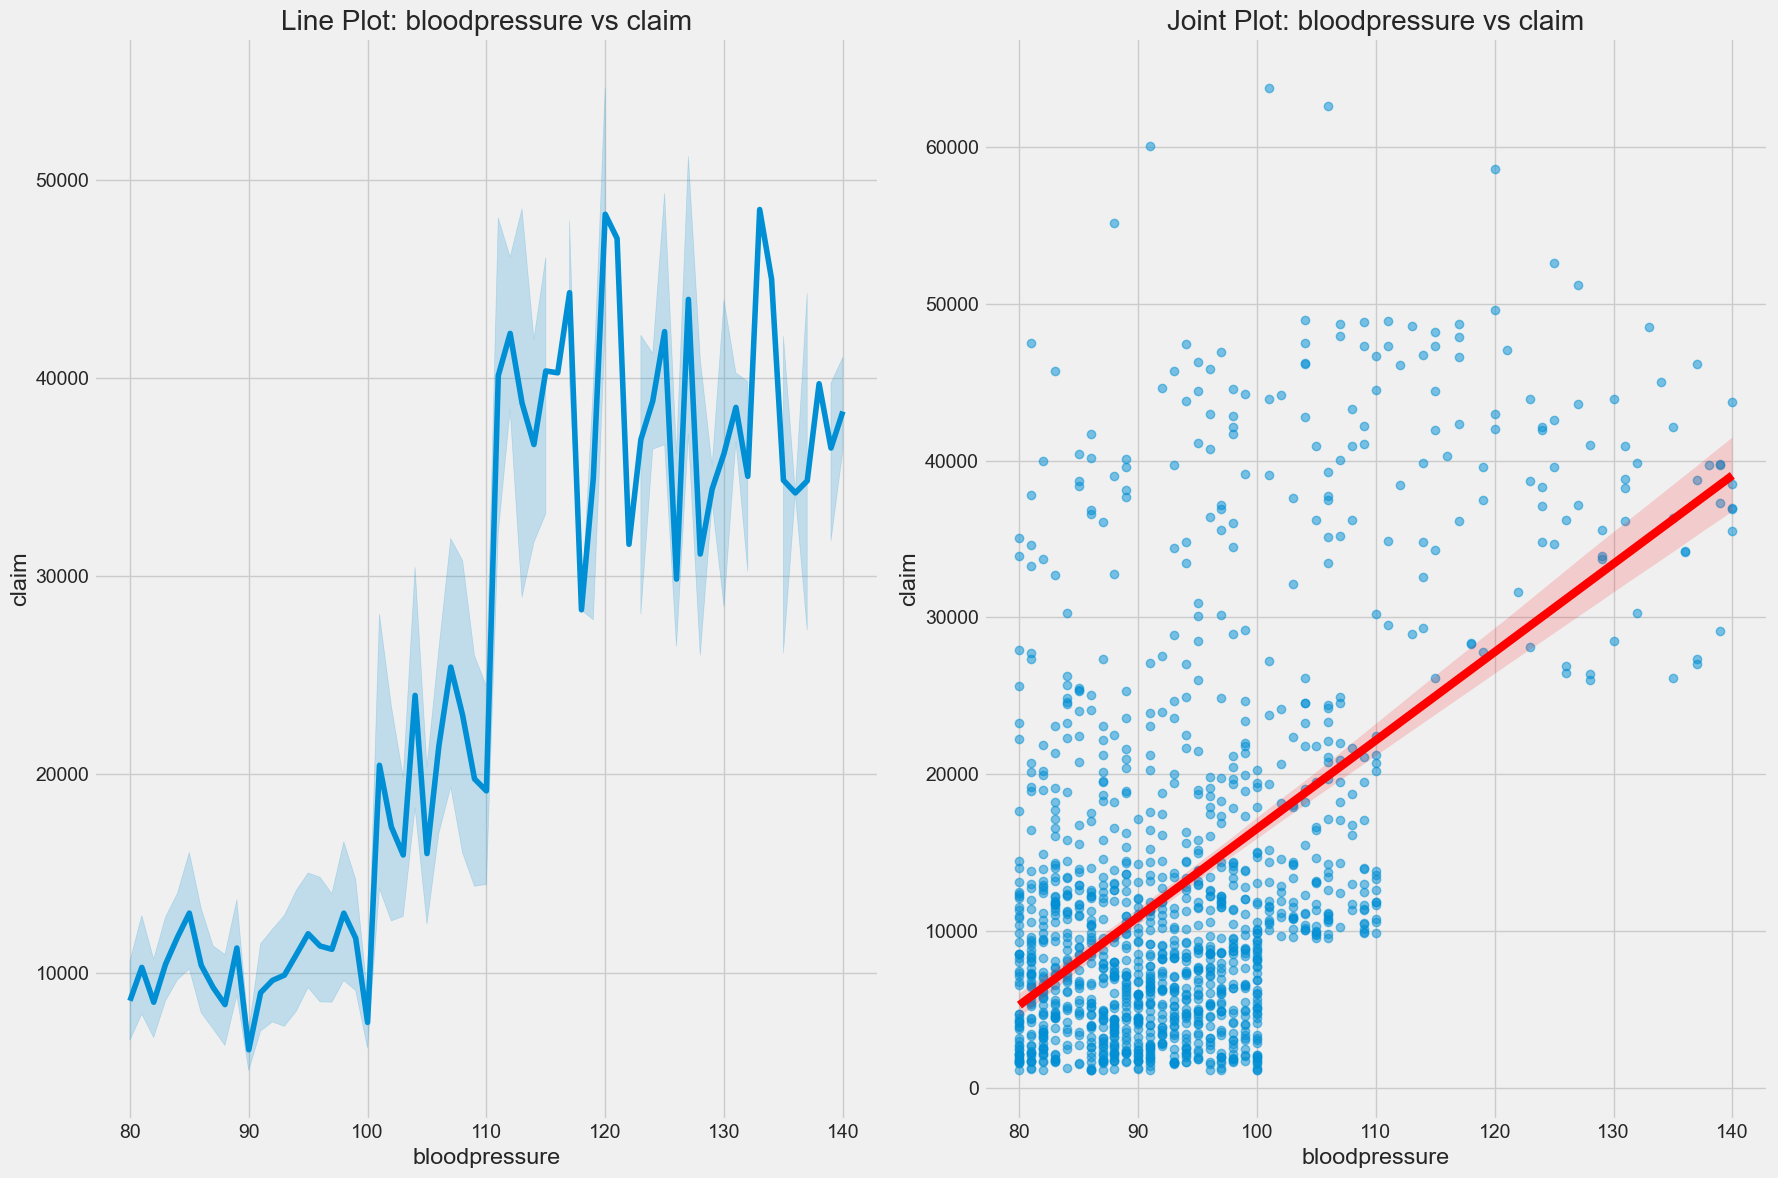

Correlation between bloodpressure and claim: 0.53






In [54]:
for num_col in numerical_columns:
    if num_col != 'claim':
        numerical_vs_numerical(data, num_col1=num_col, num_col2='claim', figsize=(18, 12))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insights:</b><br>
        <ul>
            <li>
                <b>Correlation between Age and Claim:</b> The correlation coefficient between age and claim is -0.03, indicating a very weak negative relationship. This suggests that age is not a significant predictor for the likelihood of filing a claim in this dataset. Further analysis may be needed to understand if specific age groups show different claim behaviors.
            </li>
            <li>
                <b>Correlation between BMI and Claim:</b> With a correlation coefficient of 0.20, there is a mild positive relationship between BMI and claim. This implies that individuals with higher BMI tend to file more claims, although the relationship is not strong. It highlights the importance of considering BMI as a potential factor when predicting claims, especially when combined with other health indicators.
            </li>
            <li>
                <b>Correlation between Blood Pressure and Claim:</b> The correlation between blood pressure and claim is 0.53, showing a moderate positive relationship. This significant correlation indicates that individuals with higher blood pressure are more likely to file claims. Blood pressure status is a strong predictor and should be a key feature in any predictive modeling for claims.
            </li>
        </ul>
    </span>
</div>


<a id="univariate"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.2.2 Numerical Vs Categorical
            </span>   
        </font>    
</h3>

In [24]:
def numerical_vs_categorical(data, num_col, cat_col, figsize=(18, 12),colors=['r', 'b', 'g', 'y', 'm', 'c', 'k'], agg = 'count', hue = None):
    
    fig, axes = plt.subplots(2, 2, figsize=figsize)

    cols = data[cat_col].unique()
    if len(cols) > len(colors):
        colors = sns.color_palette("hsv", len(cols))

    # Box plot
    sns.boxplot(x=cat_col, y=num_col, data=data, ax=axes[0,0], hue = cat_col, palette=colors[:len(cols)], legend=False)
    axes[0, 0].set_title(f'Box Plot: {num_col} by {cat_col}')
    axes[0, 0].set_xlabel(cat_col)
    axes[0, 0].set_ylabel(num_col)
    
    # Violin plot
    sns.violinplot(x=cat_col, y=num_col, data=data, ax=axes[0, 1], hue = cat_col, palette=colors[:len(cols)], legend=False)
    axes[0, 1].set_title(f'Violin Plot: {num_col} by {cat_col}')
    axes[0, 1].set_xlabel(cat_col)
    axes[0, 1].set_ylabel(num_col)


    # Bar plot
    means = data.groupby(by=[cat_col])[num_col].agg(func = [agg]).reset_index()
    ax = sns.barplot(x=cat_col, y=agg, data=means, ax=axes[1, 0] , hue = cat_col, palette=colors[:len(cols)], legend=False)
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(), decimals=2), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
        
    axes[1, 0].set_title(f'Bar Plot: Mean {num_col} by {cat_col}')
    axes[1, 0].set_xlabel(cat_col)
    axes[1, 0].set_ylabel(f'{agg} {num_col}')
    
    # swarm plot
    sns.stripplot(x=cat_col, y=num_col, data=data, ax=axes[1, 1], hue = cat_col , palette=colors[:len(cols)], legend=False)
    axes[1, 1].set_title(f'Swarm Plot: {num_col} by {cat_col}')
    axes[1, 1].set_xlabel(cat_col)
    axes[1, 1].set_ylabel(num_col)
    plt.tight_layout()
    plt.show()
    
    print('\n'*4)

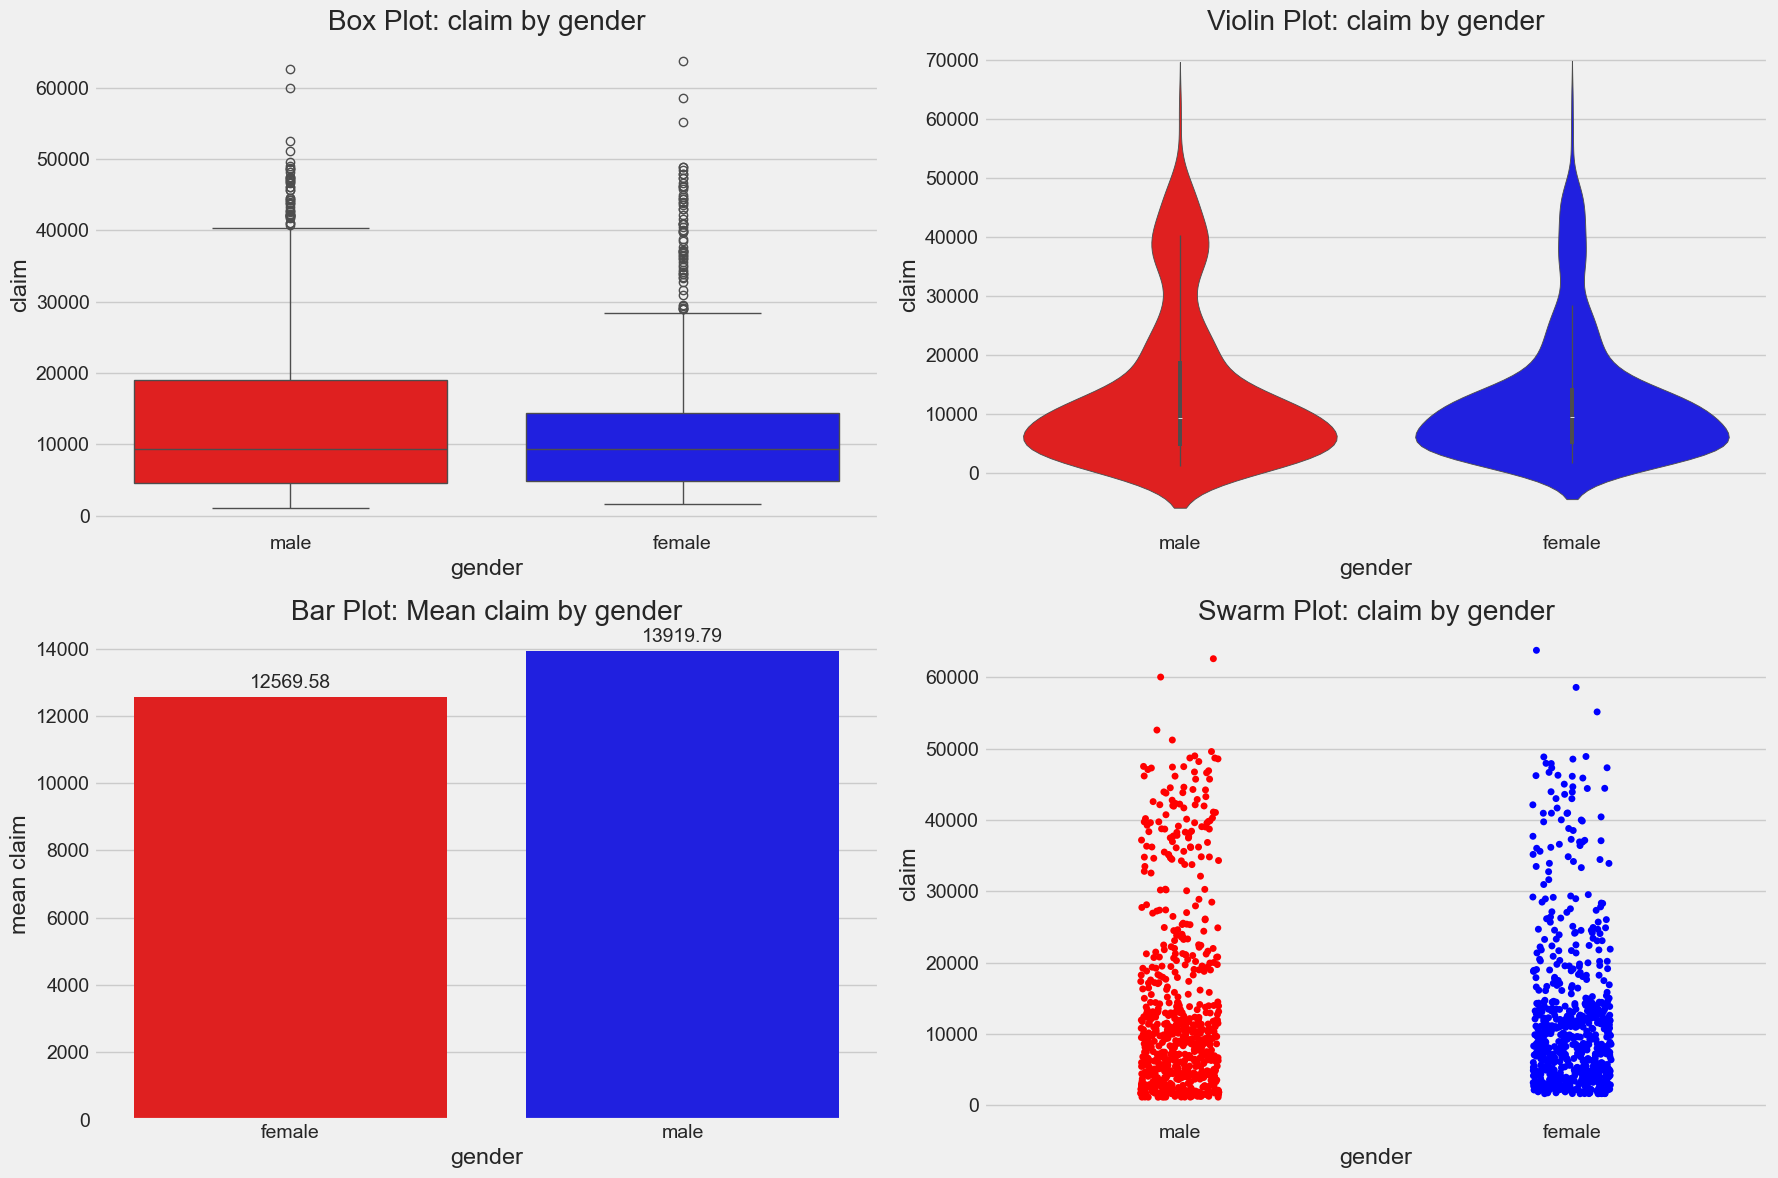

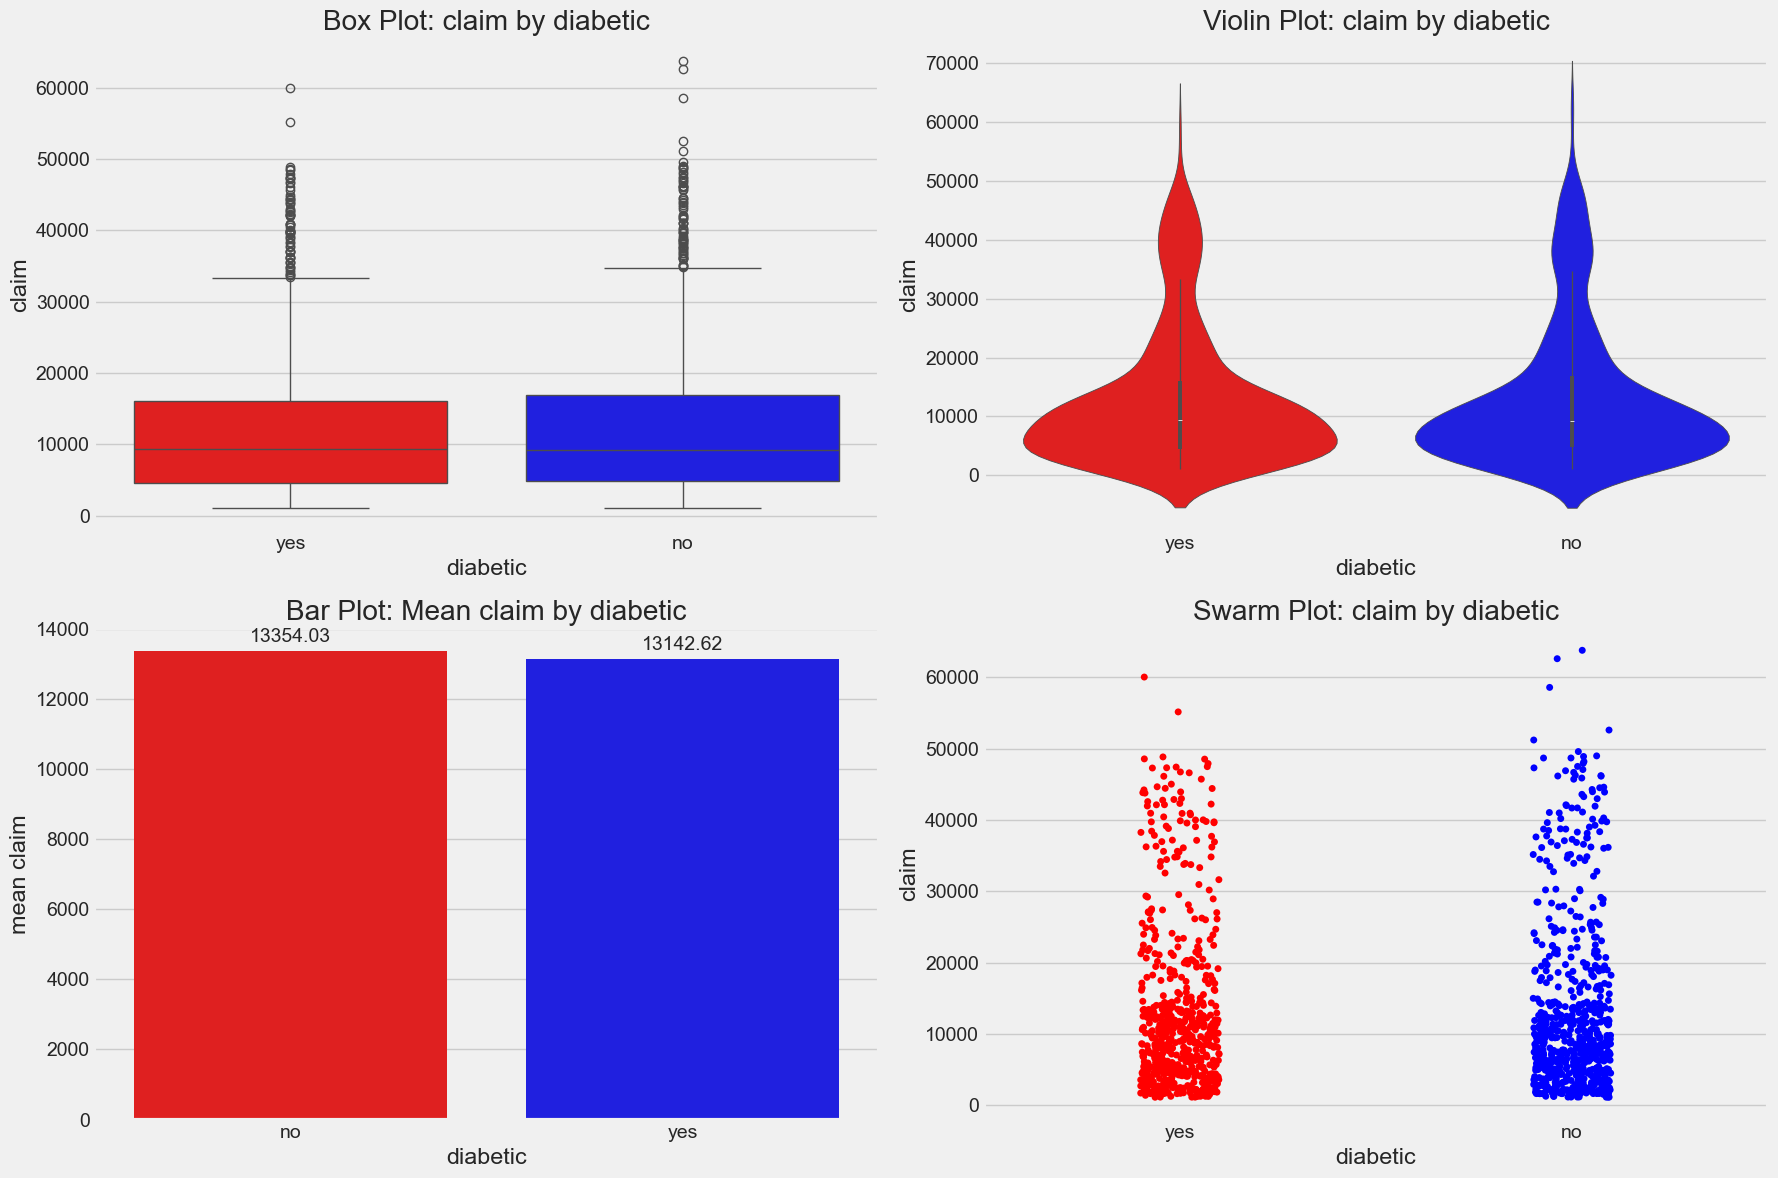

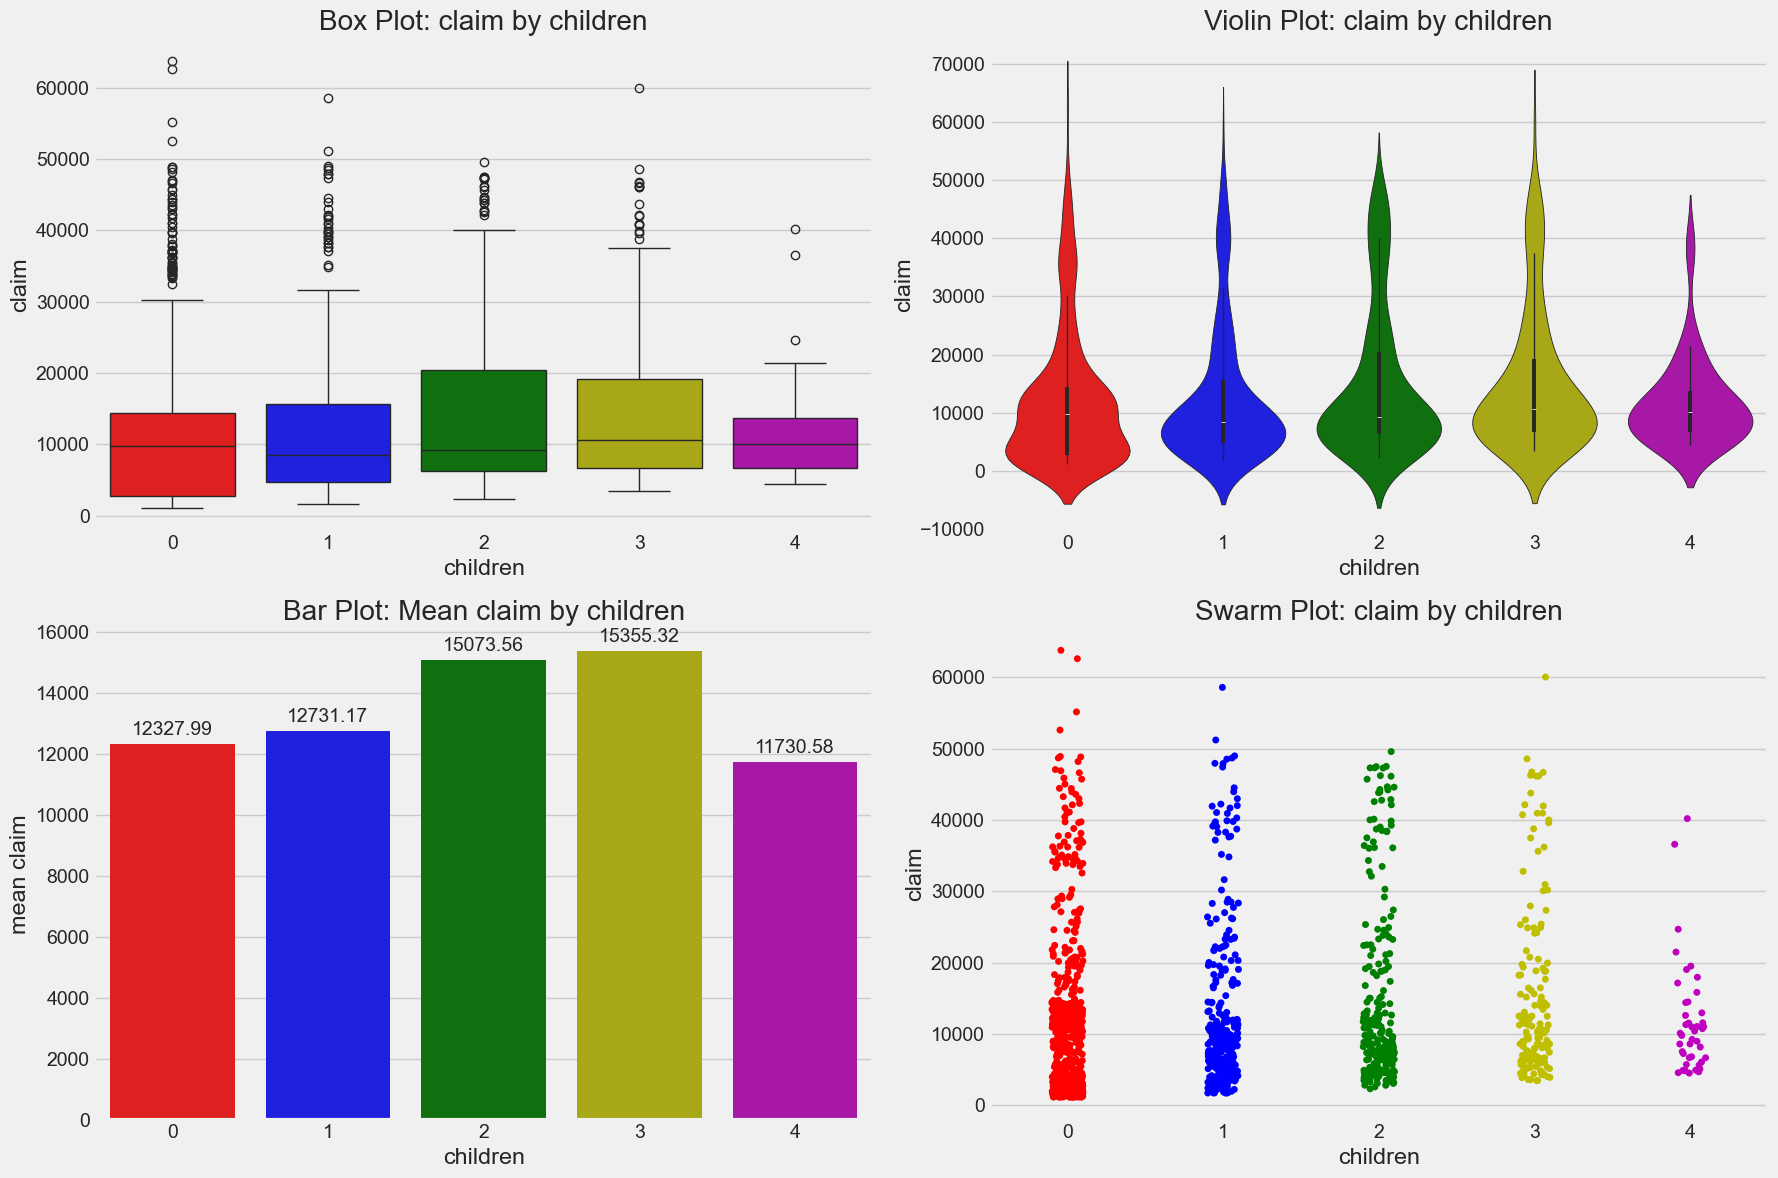

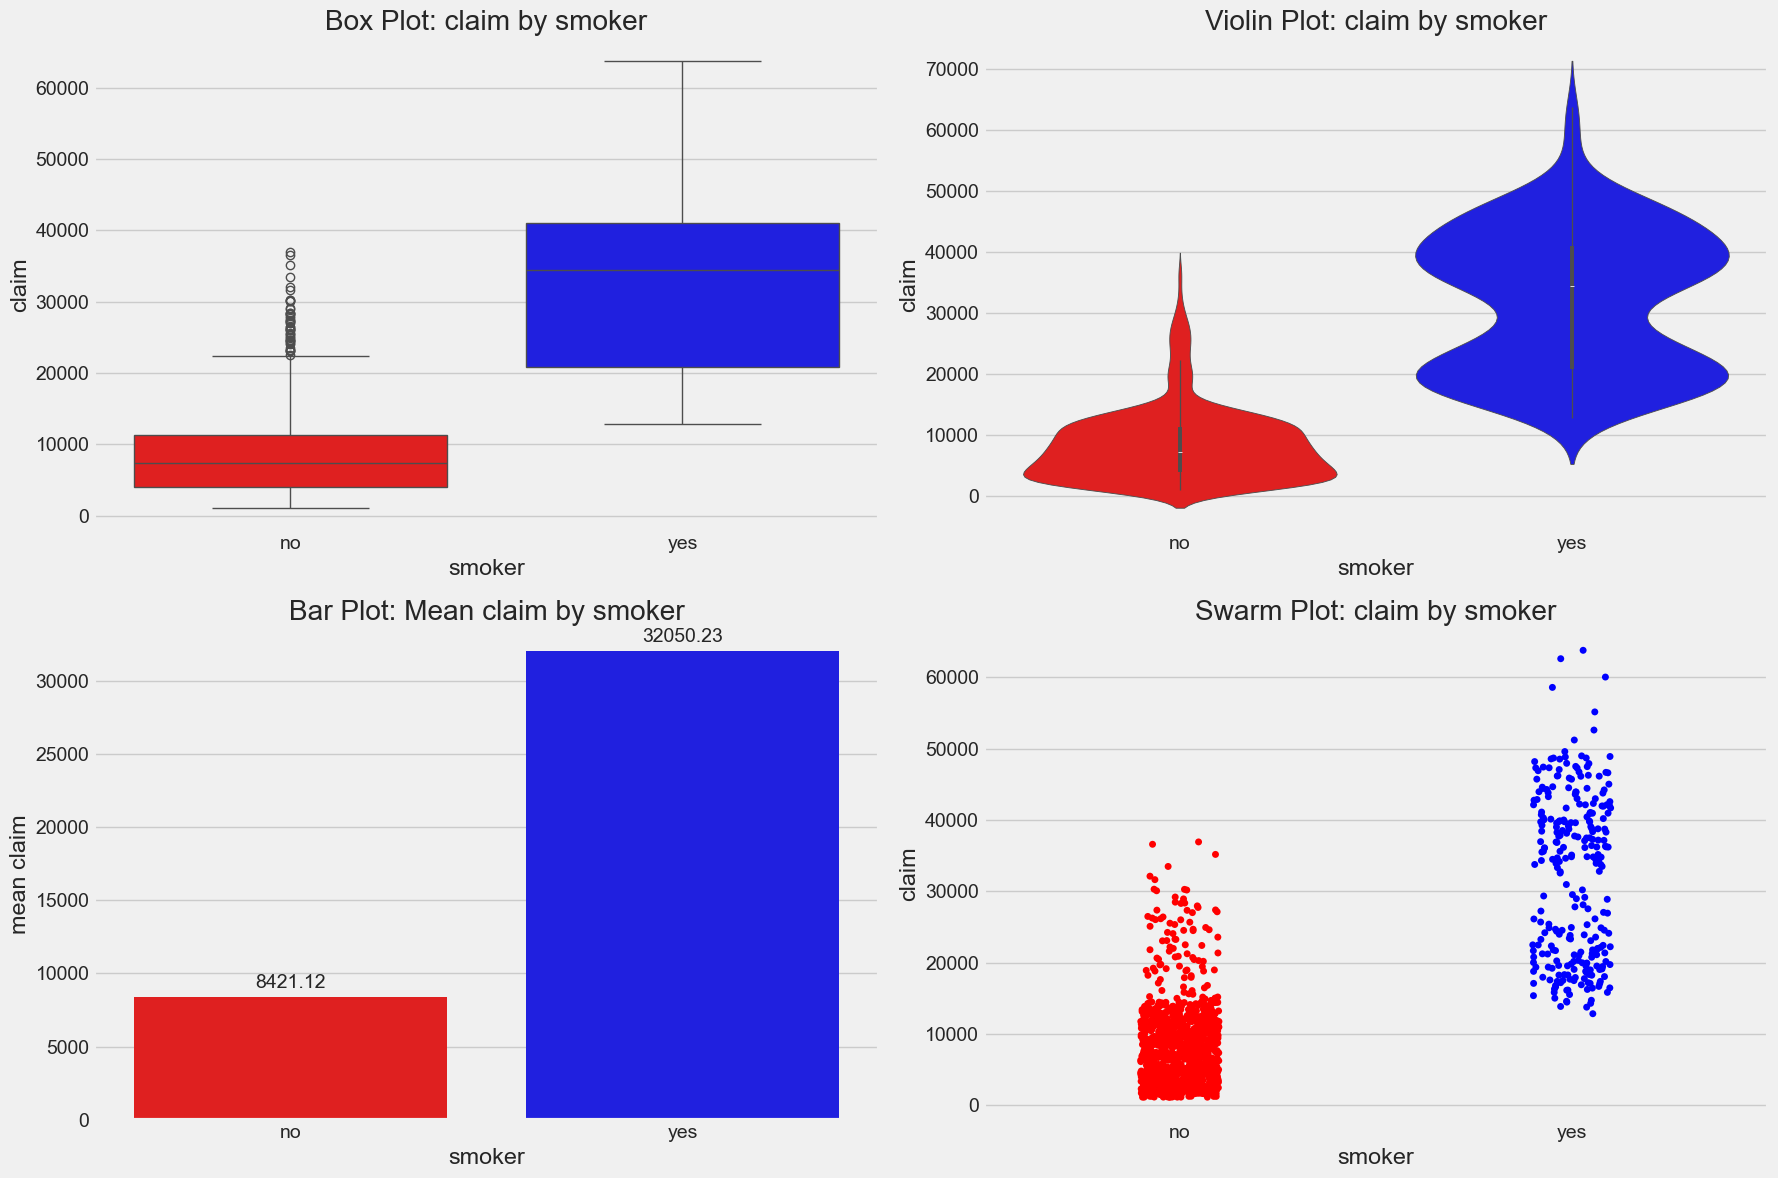

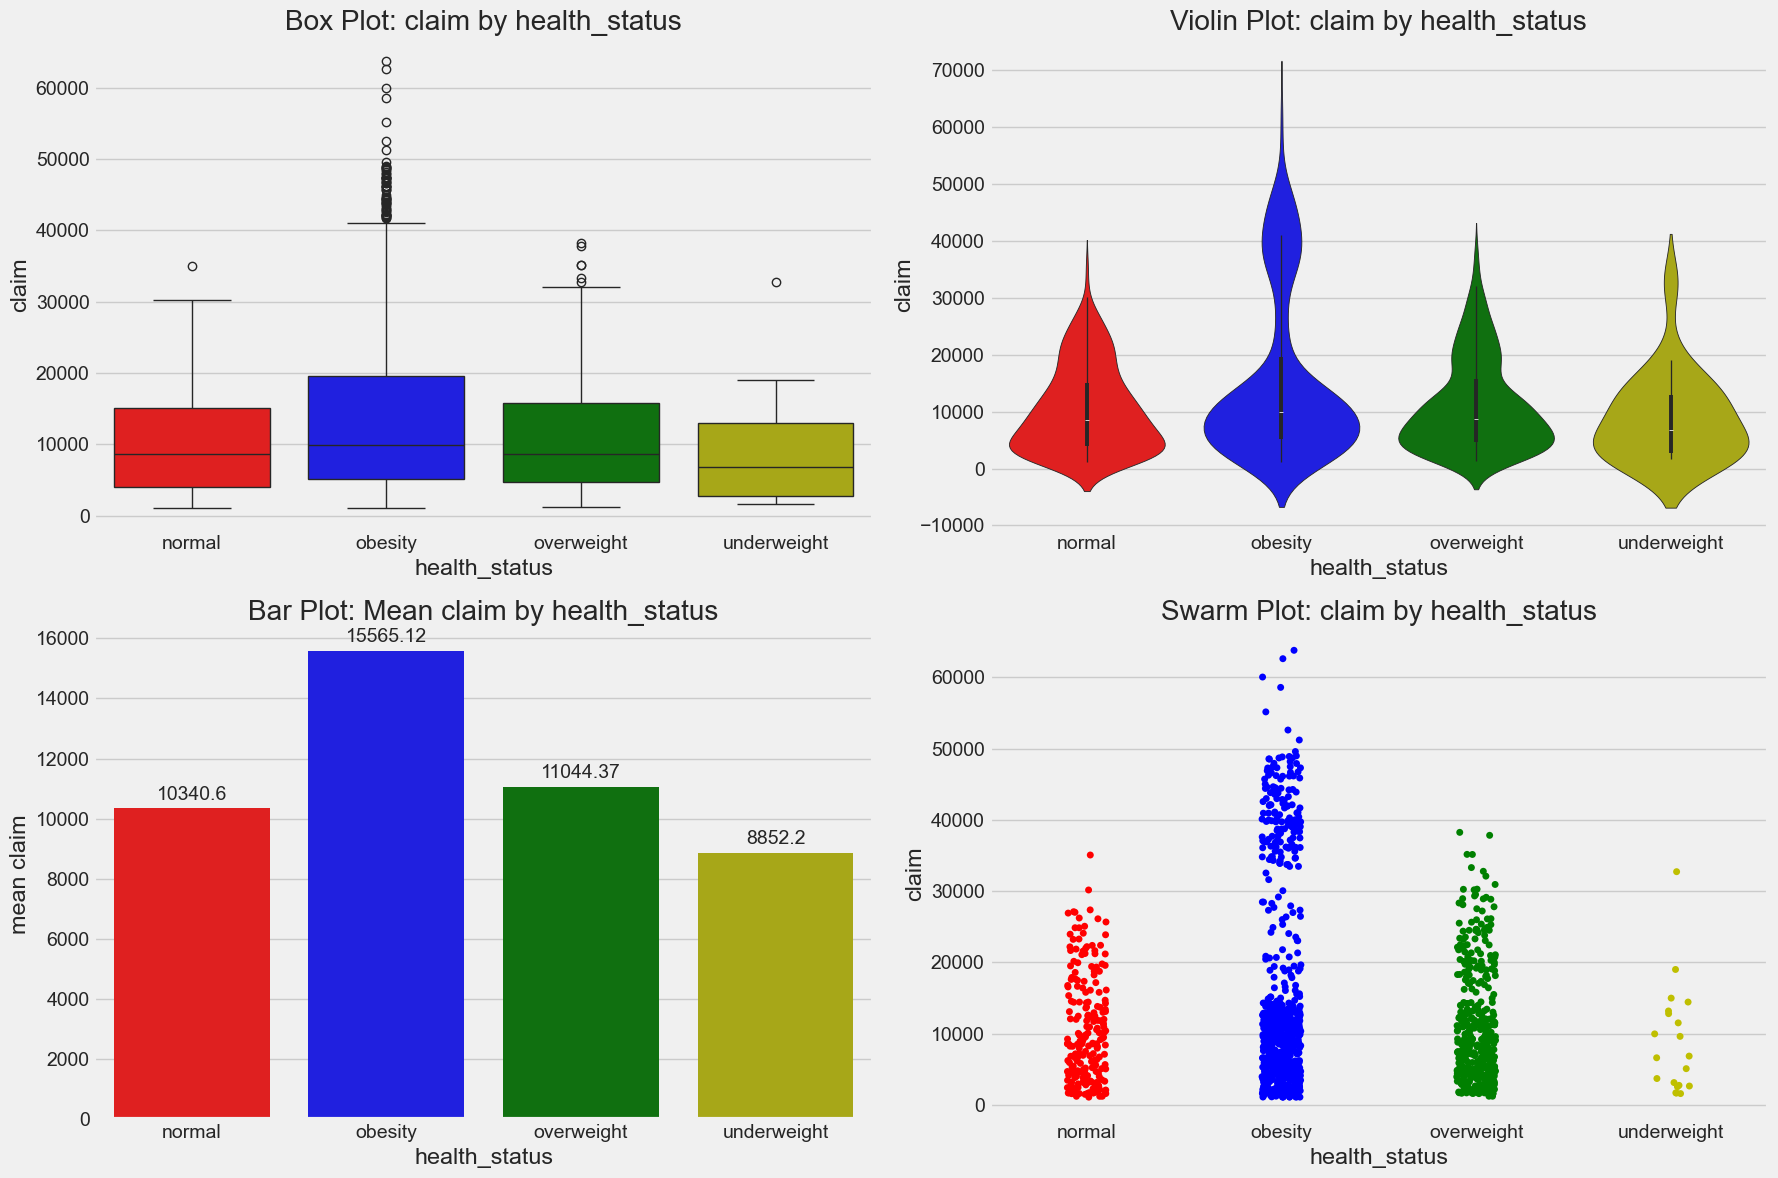

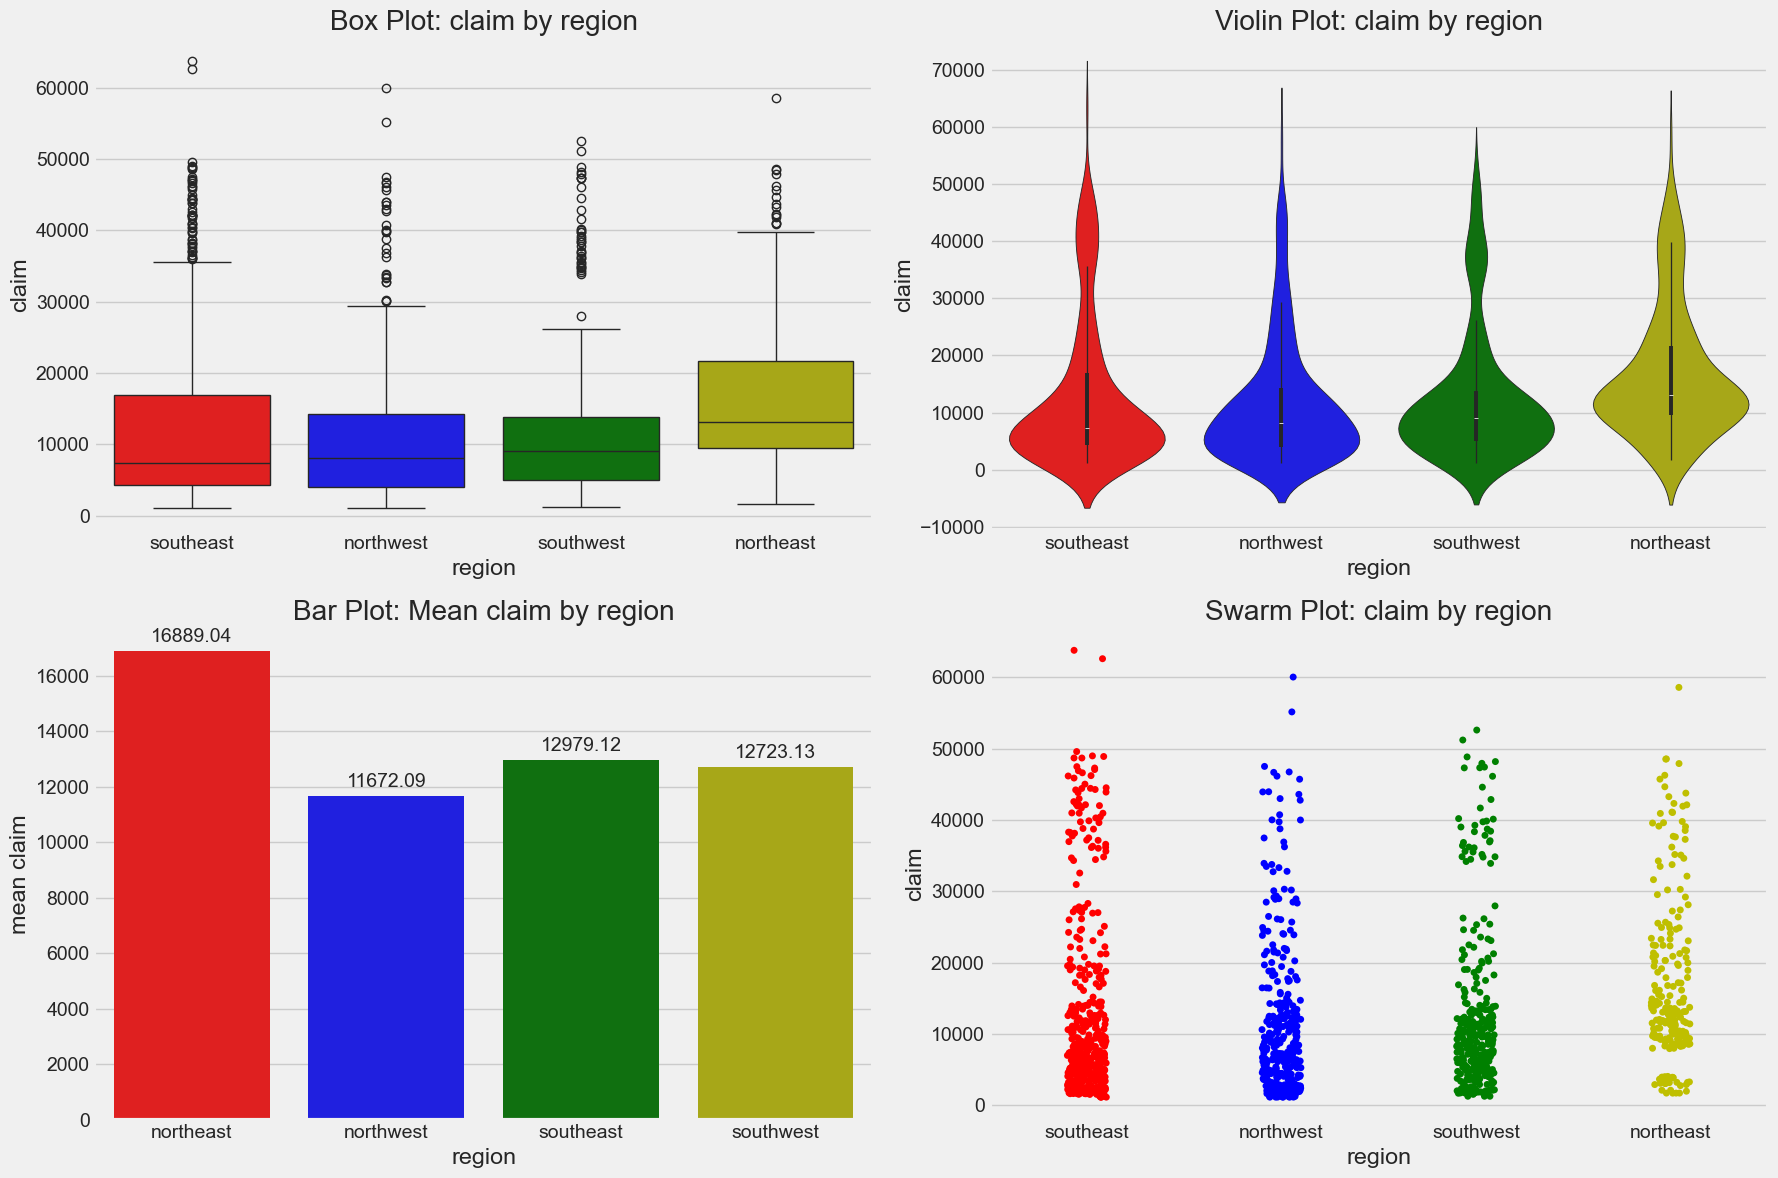

In [25]:
for cat_col in categorical_columns:
    numerical_vs_categorical(data, num_col='claim', cat_col=cat_col, agg = 'mean', figsize=(18, 12))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insights:</b><br>
        <ul>
            <li>
                <b>Claim by Gender:</b> The mean claim amount for males (13,919.79) is higher than for females (12,569.58). This indicates that males tend to file higher claims compared to females. Gender could be a significant factor to consider in predicting claim amounts.
            </li>
            <li>
                <b>Claim by Diabetic Status:</b> The mean claim amounts for diabetic (13,142.62) and non-diabetic (13,354.03) individuals are almost identical, indicating that diabetic status does not significantly impact the claim amount. Therefore, diabetic status might not be a critical factor in predicting claim amounts.
            </li>
            <li>
                <b>Claim by Number of Children:</b> Individuals with 2 children (15,073.56) and 3 children (15,355.32) have higher mean claim amounts than those with other numbers of children. This suggests that families with 2 or 3 children might incur higher healthcare costs, making the number of children an important variable in claim prediction.
            </li>
            <li>
                <b>Claim by Smoking Status:</b> Smokers have a significantly higher mean claim amount (32,050.23) compared to non-smokers (8,421.12). This strong disparity highlights smoking as a major factor affecting healthcare costs and claim amounts, underscoring the need to consider smoking status in predictive models.
            </li>
            <li>
                <b>Claim by Health Status:</b> Individuals categorized as obese have the highest mean claim amount (15,565.12), followed by overweight (11,044.37), normal (10,340.60), and underweight (8,852.20). This trend shows that poorer health status (obesity) correlates with higher claims, making health status a crucial variable in understanding and predicting claims.
            </li>
            <li>
                <b>Claim by Region:</b> People from the northeast region have the highest mean claim amount (16,889.04), followed by southeast (12,979.12), southwest (12,723.13), and northeast (11,672.09). This geographical variation in claim amounts suggests that regional factors may influence healthcare costs and should be considered in predictive models.
            </li>
        </ul>
    </span>
</div>


<a id="univariate"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.2.3 Categorical Vs Categorical
            </span>   
        </font>    
</h3>

In [26]:
categorical_columns

['gender', 'diabetic', 'children', 'smoker', 'health_status', 'region']

In [92]:
def categorical_vs_categorical(data, cat_col1, cat_col2, figsize=(10, 6)):
    data_pivot = pd.pivot_table(data=data,
                                index = [cat_col1, cat_col2],
                                values = 'claim',
                                aggfunc = 'count').reset_index()

    data_pivot.columns = [cat_col1, cat_col2, 'count']

    plt.figure(figsize=figsize)

    ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_pivot)

    for p in ax.patches:
        ax.annotate(np.round(p.get_height(), decimals=2),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points')

    plt.title(f'{cat_col1} vs {cat_col2}')
    plt.show()

    print('\n'*4)

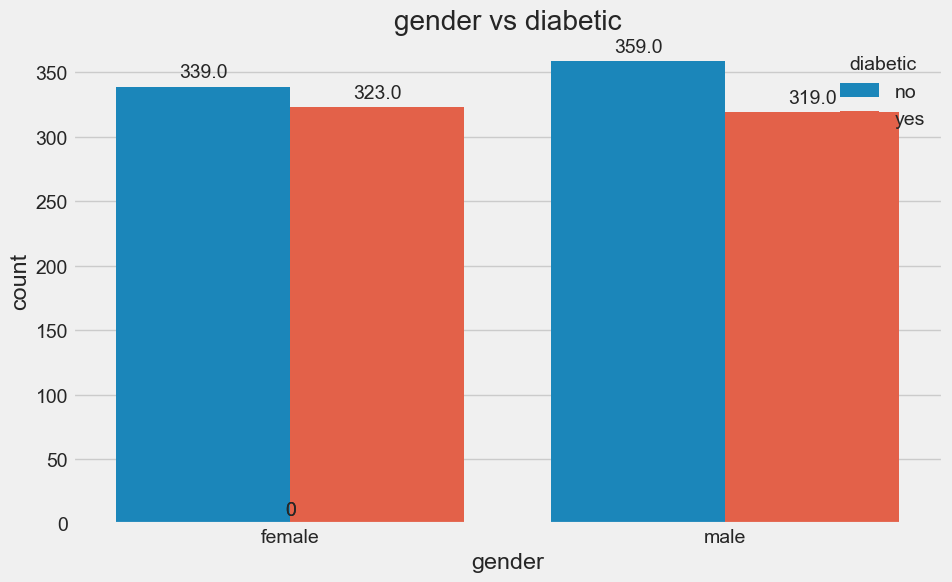

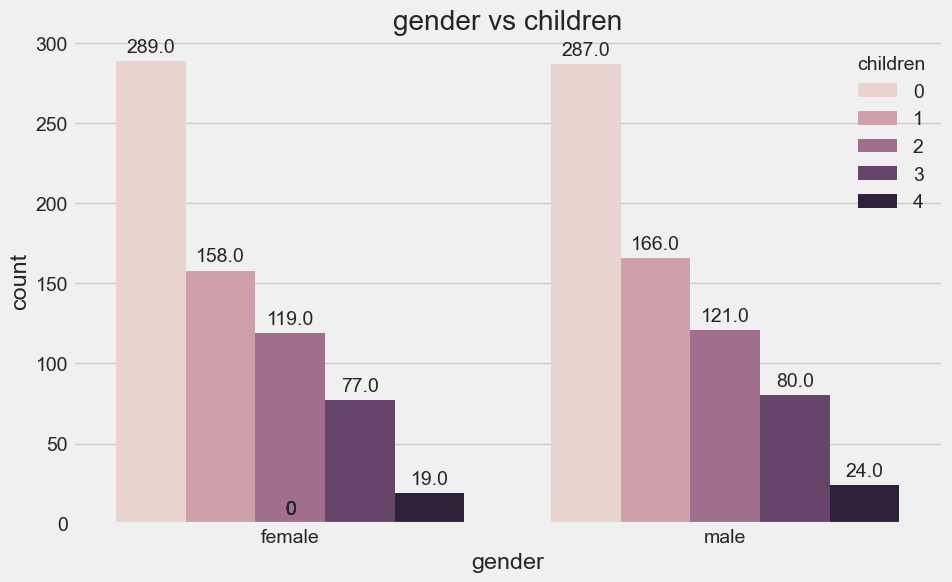

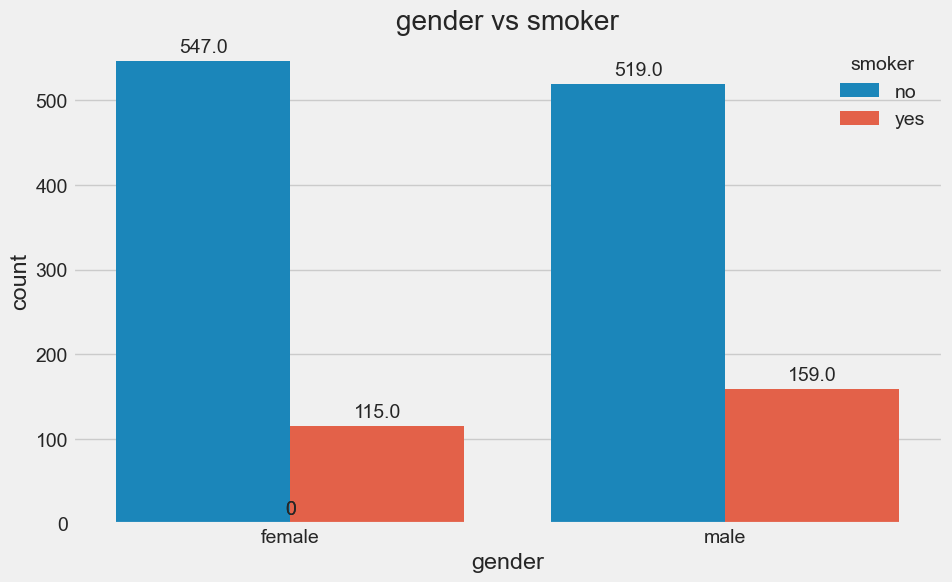

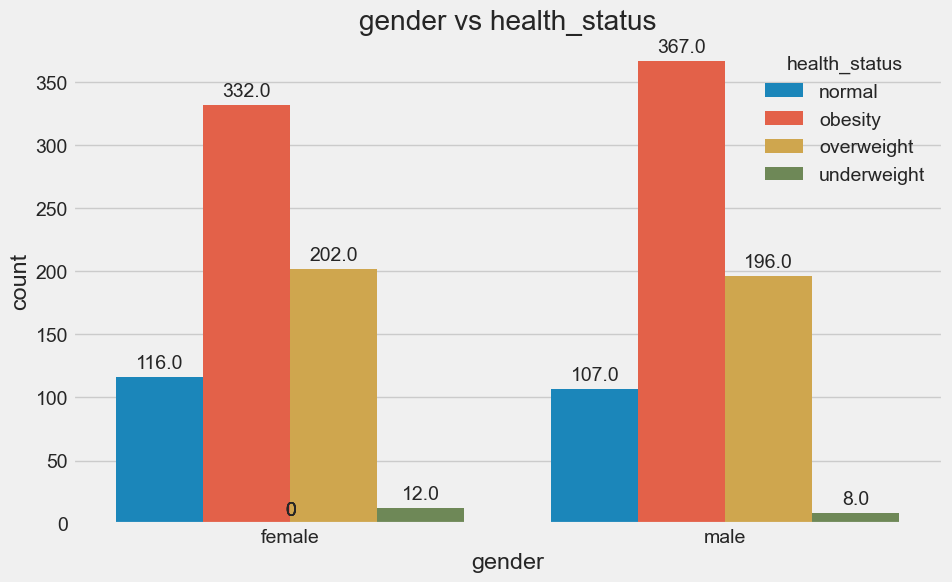

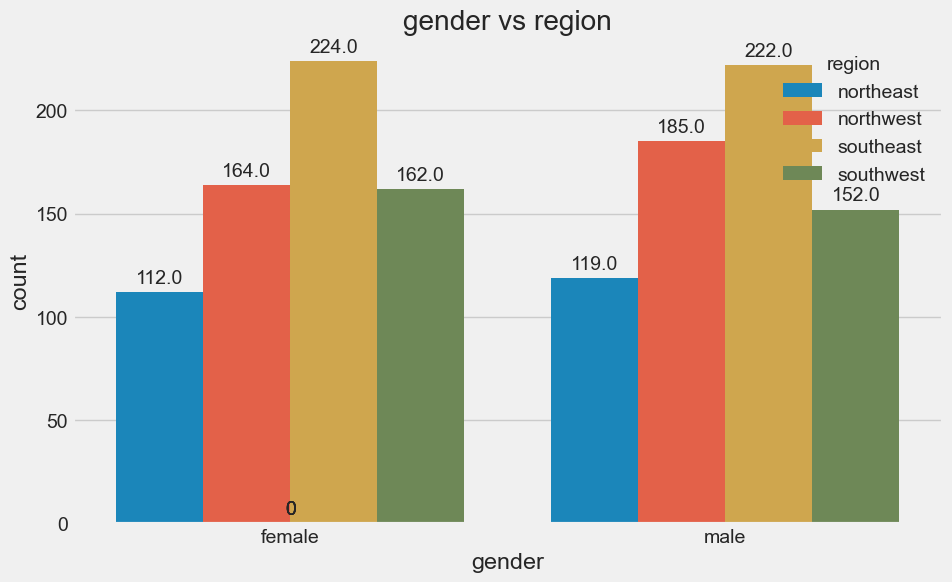

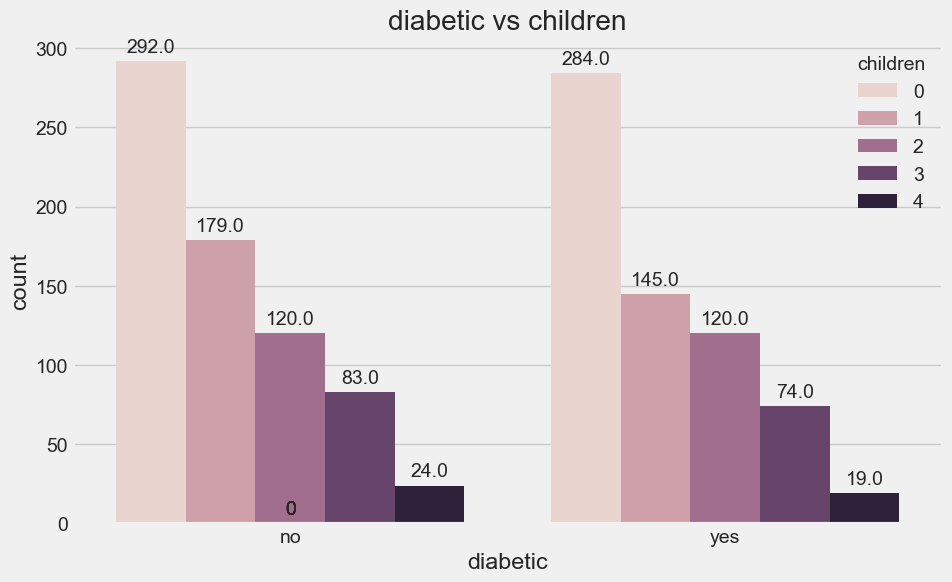

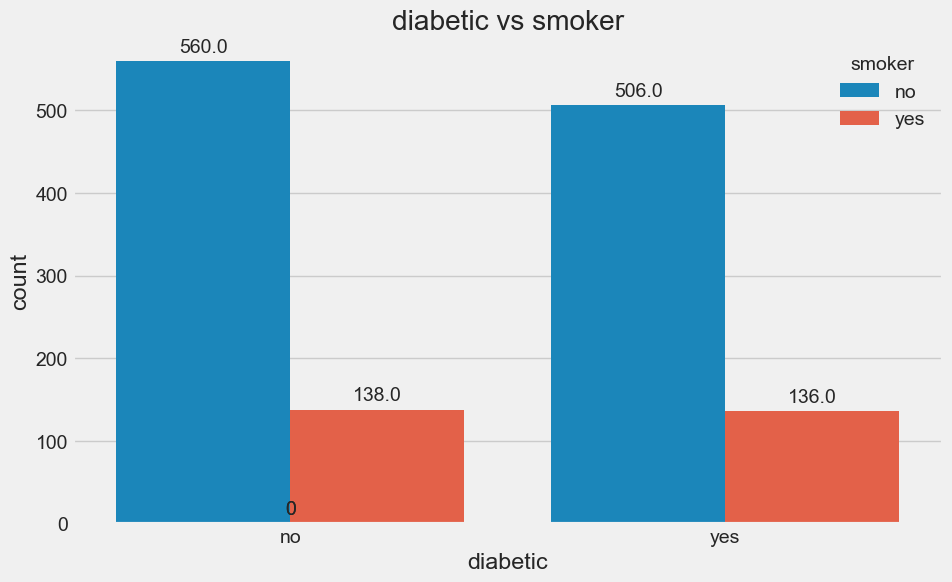

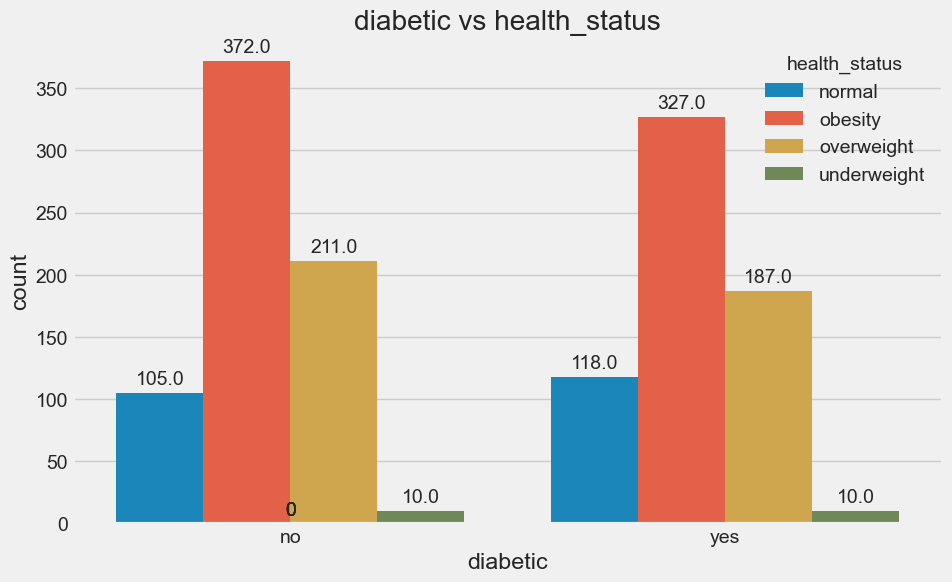

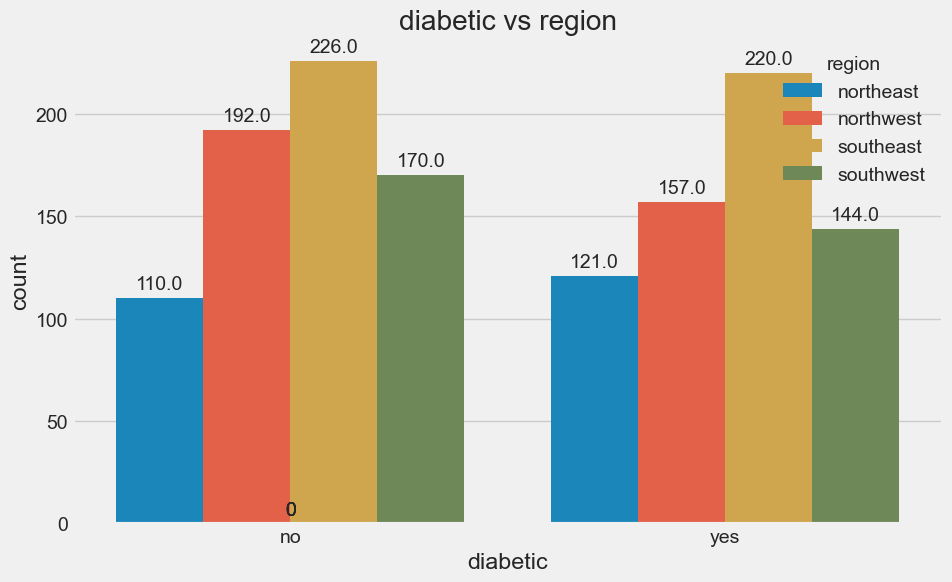

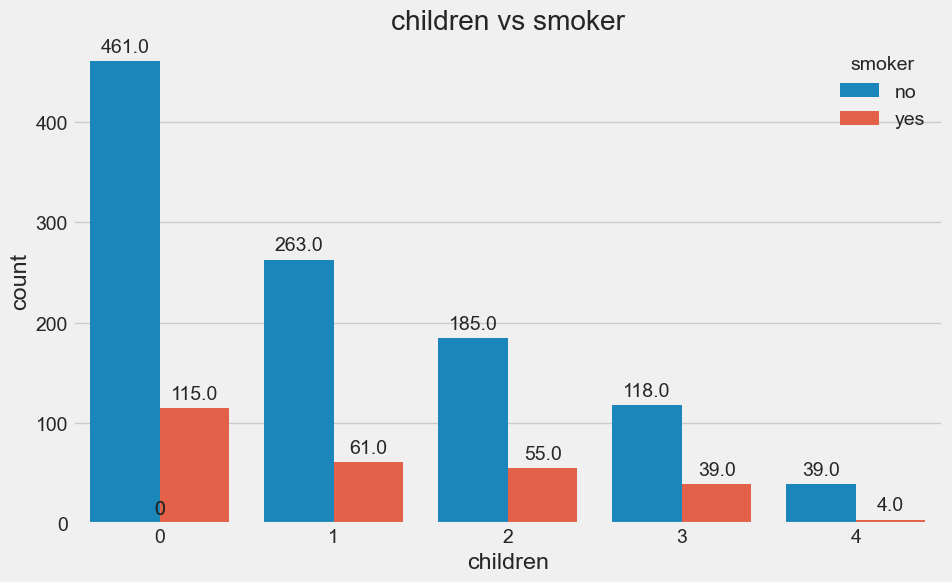

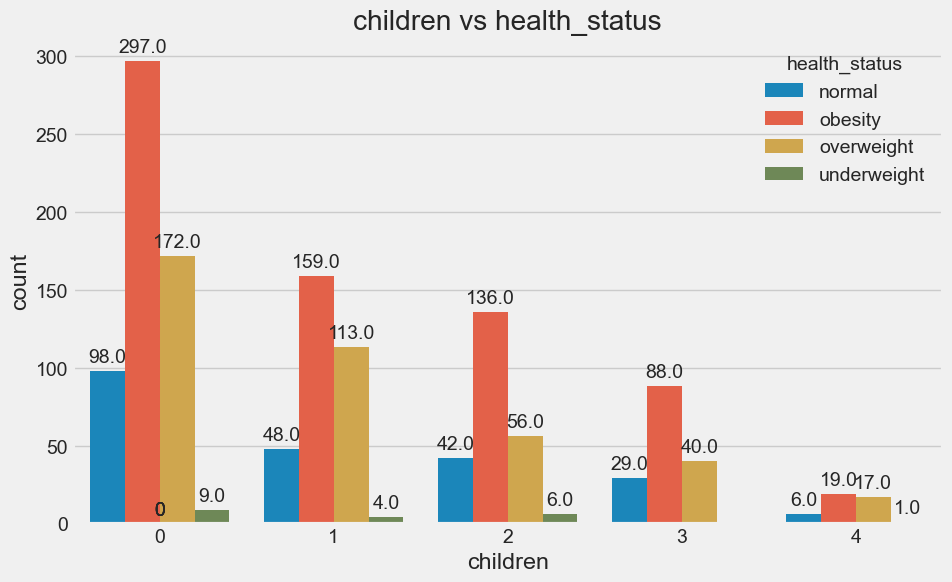

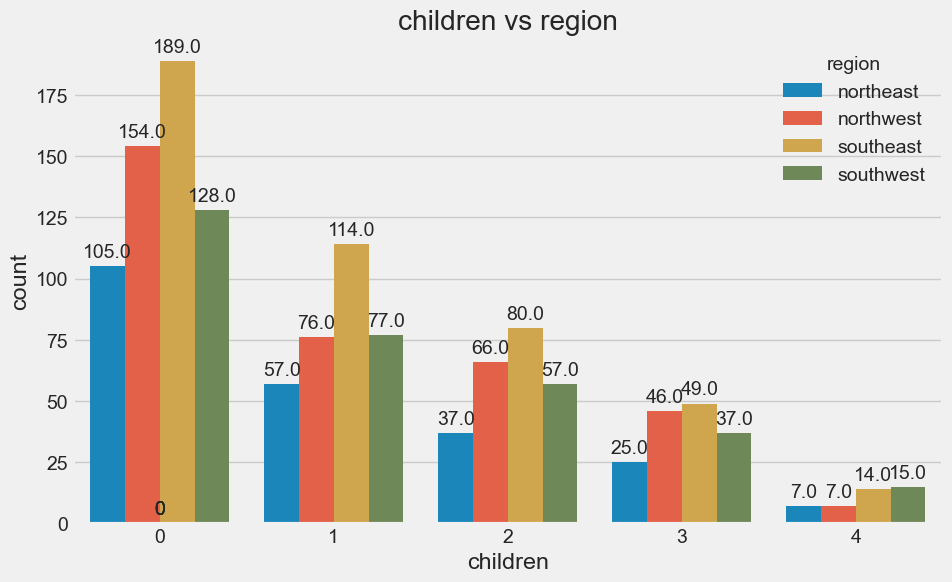

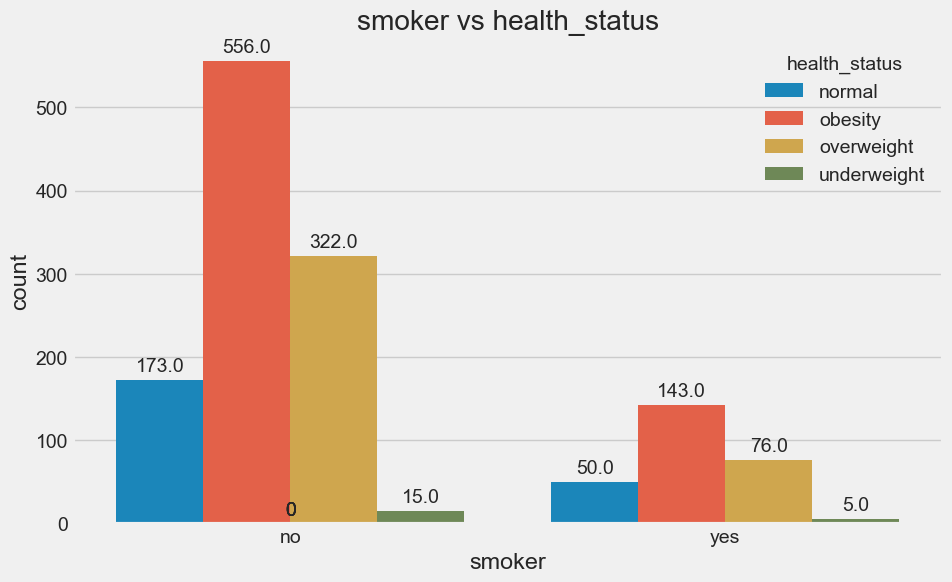

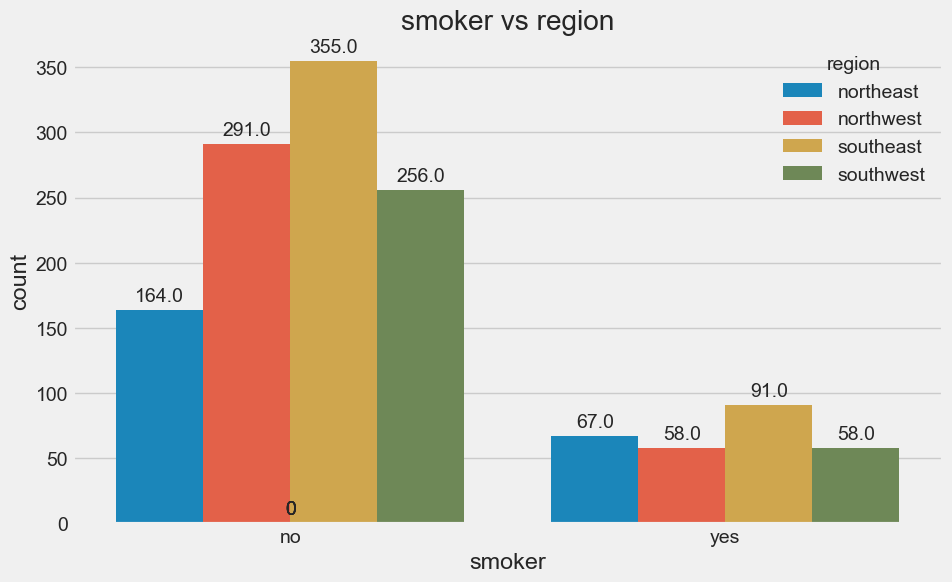

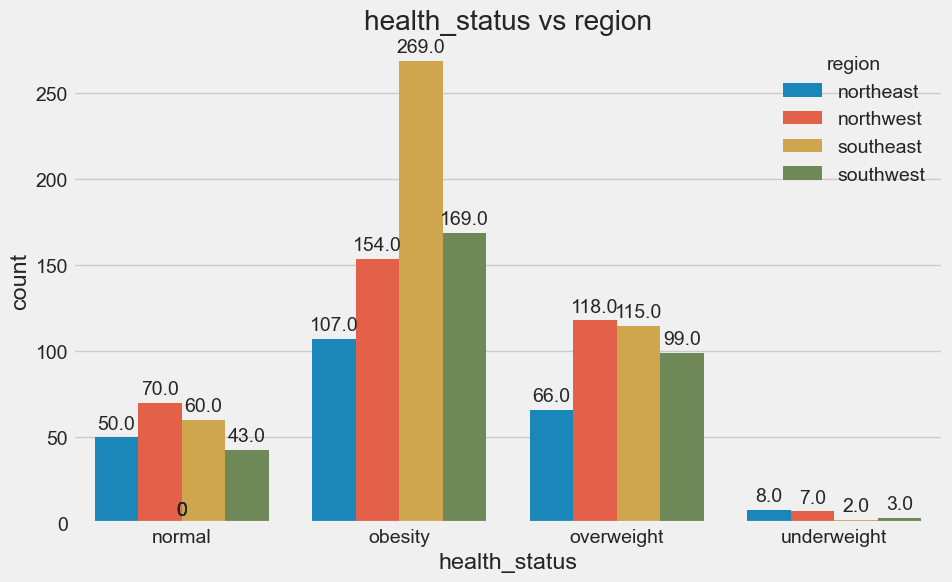

In [100]:
Dict = {}
for cat_col in categorical_columns:
    for cat_col2 in categorical_columns:
        if (cat_col != cat_col2):
            if (f'{cat_col} vs {cat_col2}' not in Dict) and (f'{cat_col2} vs {cat_col}' not in Dict):
                Dict[f'{cat_col} vs {cat_col2}'] = 1
                categorical_vs_categorical(data, cat_col1=cat_col, cat_col2=cat_col2, figsize=(10, 6))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insights:</b><br>
        <ul>
            <li>
                <b>Gender vs Diabetic:</b> Both females and males who do not have diabetes tend to claim more. This suggests that non-diabetic individuals might have higher healthcare costs, which could be due to other underlying health issues or conditions not related to diabetes.
            </li>
            <li>
                <b>Gender vs Children:</b> Females and males without any children are claiming more. This may indicate that individuals without children might have more disposable income to spend on healthcare or other factors influencing their higher claim amounts.
            </li>
            <li>
                <b>Gender vs Smoker:</b> Nonsmoking females and males are claiming more. This is an interesting finding as it contrasts with the general trend of smokers incurring higher healthcare costs. This could be due to nonsmokers potentially having better access to healthcare services or higher usage rates.
            </li>
            <li>
                <b>Gender vs Health Status:</b> Both females and males who are obese are claiming more. Obesity is a well-known factor contributing to various health complications, leading to higher healthcare costs and claim amounts.
            </li>
            <li>
                <b>Gender vs Region:</b> Females and males from the southeast region are claiming more. This regional disparity could be due to differences in healthcare costs, availability of healthcare services, or socioeconomic factors prevalent in the southeast.
            </li>
        </ul>
    </span>
</div>


<div class="alert alert-block alert-success" style="background-color: #E2F4E1;">
    <span style='font-family: Georgia;'>
        <a id="infer"></a>
        <h2><font color="green">Final Inference</font></h2>
        <p>
            <span style='font-family:Georgia'>
                Our Exploratory Data Analysis of the Insurance dataset has yielded several insightful findings that shed light on the factors influencing claim amounts:
            </span>
        </p>
        <ul>
            <li><span style='font-family:Georgia'>Age shows minimal skewness and no outliers, indicating a balanced age distribution among the insured individuals.</span></li>
            <li><span style='font-family:Georgia'>BMI has slight skewness and a few outliers, suggesting that most individuals have BMI within a normal range, but there are some cases of extreme values.</span></li>
            <li><span style='font-family:Georgia'>Blood pressure shows high skewness and kurtosis with numerous outliers, indicating a significant variation and presence of extreme values in blood pressure readings.</span></li>
            <li><span style='font-family:Georgia'>Males and females are nearly equally represented, and the data shows a balanced distribution across different categories like diabetic status, number of children, and region.</span></li>
            <li><span style='font-family:Georgia'>Smokers make up a smaller proportion of the dataset, yet they have significantly higher mean claim amounts compared to nonsmokers.</span></li>
            <li><span style='font-family:Georgia'>Obese individuals have higher mean claim amounts, reflecting the higher healthcare costs associated with obesity-related health issues.</span></li>
            <li><span style='font-family:Georgia'>The southeast region has the highest mean claim amounts, suggesting regional differences in healthcare costs or utilization.</span></li>
            <li><span style='font-family:Georgia'>Correlation analysis reveals that blood pressure has the strongest positive correlation with claim amounts, followed by BMI, while age has a negligible negative correlation with claim amounts.</span></li>
        </ul>
        <h3><font color="green">Conclusion and Best Features for Future Model Prediction</font></h3>
        <p>
            <span style='font-family:Georgia'>
                Through this in-depth EDA, we've identified several key features that can be instrumental for future predictive models aimed at understanding and predicting insurance claims:
            </span>
        </p>
        <ul>
            <li><span style='font-family:Georgia'><b>Blood Pressure:</b> The strongest positive correlation with claim amounts makes this a critical feature for prediction.</span></li>
            <li><span style='font-family:Georgia'><b>BMI:</b> Given its significant correlation with claim amounts, BMI is an essential predictor of healthcare costs.</span></li>
            <li><span style='font-family:Georgia'><b>Smoking Status:</b> The stark contrast in mean claim amounts between smokers and nonsmokers highlights the importance of this feature.</span></li>
            <li><span style='font-family:Georgia'><b>Health Status:</b> Obesity's impact on claim amounts makes it a key variable in predictive modeling.</span></li>
            <li><span style='font-family:Georgia'><b>Region:</b> Regional differences in claim amounts suggest that geographic location is a significant factor.</span></li>
        </ul>
        <p>
            <span style='font-family:Georgia'>
                By incorporating these features into predictive models, we can develop a robust understanding of the factors influencing insurance claims. This analysis not only helps grasp historical data nuances but also improves our ability to build accurate predictive models for insurance claims in the future.
            </span>
        </p>
    </span>
</div>
